(None, 192, 192, 192, 1)
(None, 192, 192, 192, 1)
(None, 192, 192, 192, 1)
(None, 192, 192, 192, 1)
(None, 192, 192, 192, 1)
models_synth_less_conc_90_shapes_feta_192/weights_epoch_640.h5 detection False
loading second model!
bn: False norm: False 90 True
models_synth_less_conc_90_shapes_feta_192/weights_epoch_640.h5
Loaded weights from the checkpoint and continued training.
loading second model!
bn: False norm: False 90 True
Checkpoint file not found.


100%|██████████| 28/28 [00:33<00:00,  1.18s/it]


loading second model!
bn: False norm: False 90 True
models_synth_less_conc_90_shapes_feta_192/weights_epoch_600.h5
Loaded weights from the checkpoint and continued training.


100%|██████████| 28/28 [00:39<00:00,  1.41s/it]


Hard Dice Coefficient: 0.13707346447209956
Soft Dice Coefficient: -0.5146440267562866


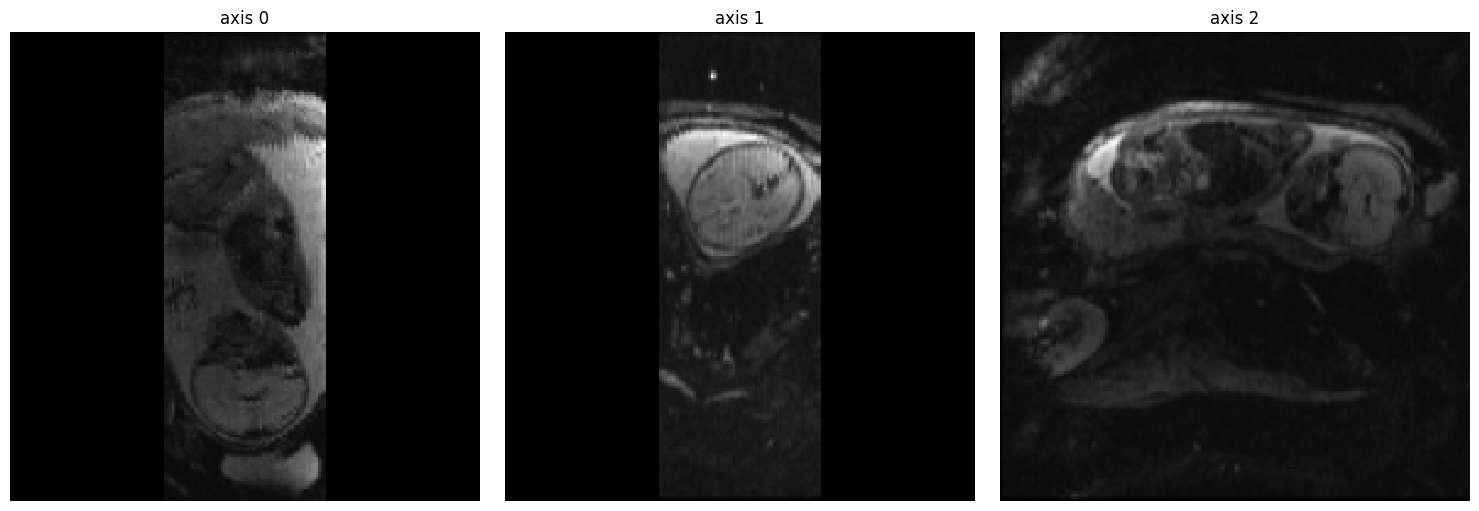

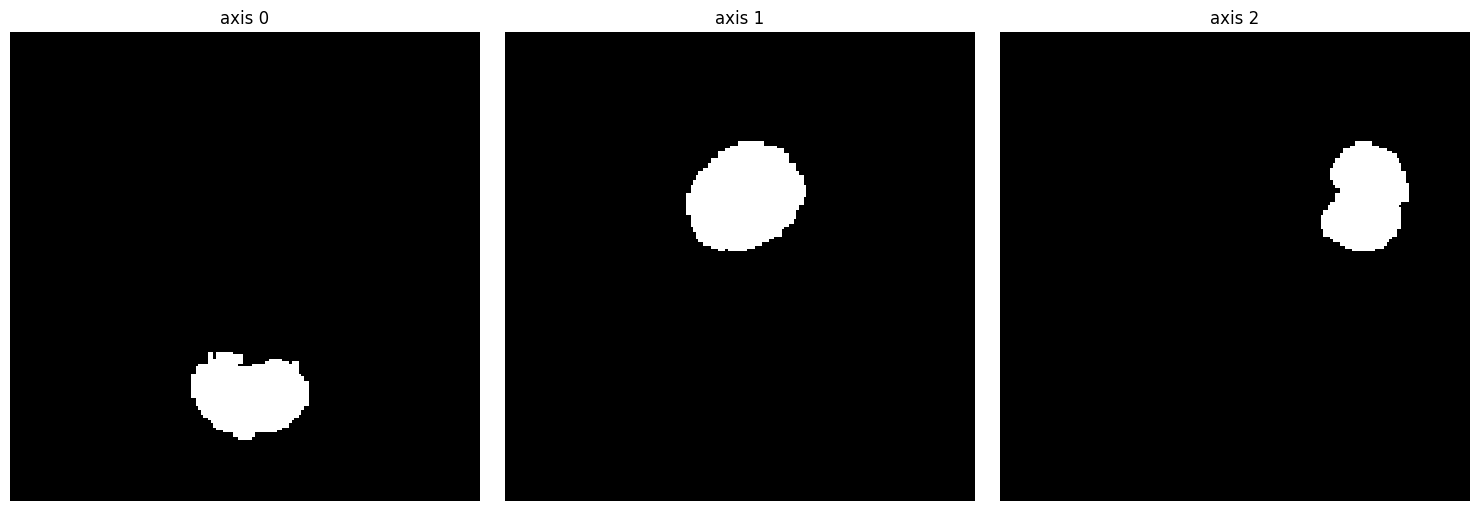

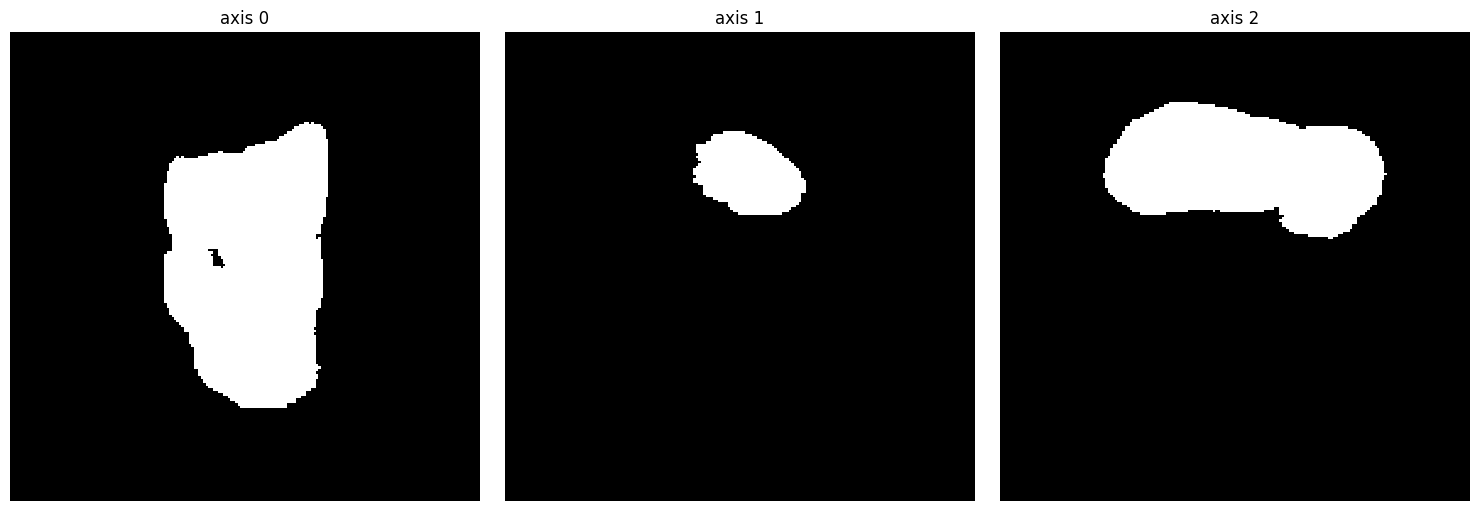

Hard Dice Coefficient: 0.0007452752247470599
Soft Dice Coefficient: -0.5121380686759949


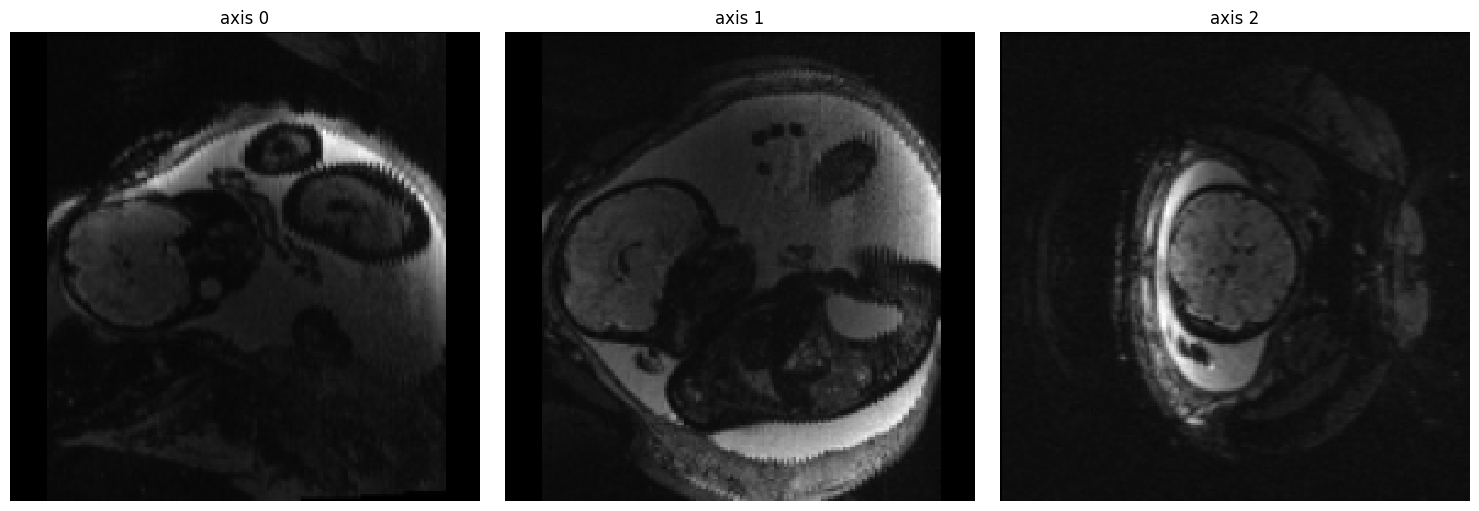

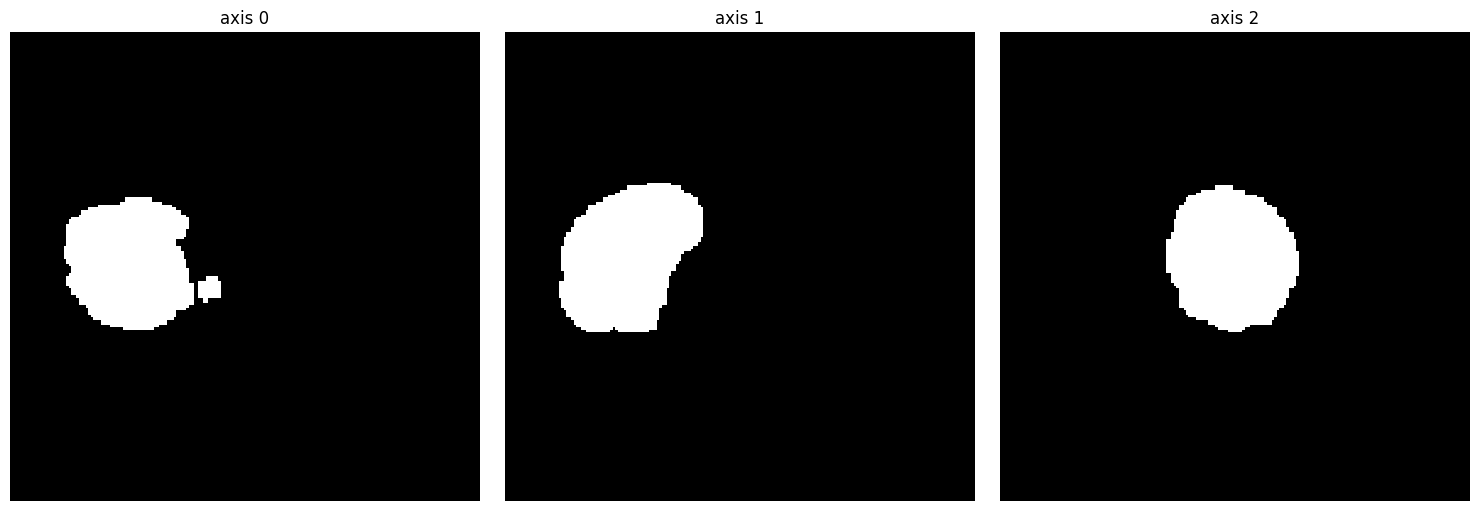

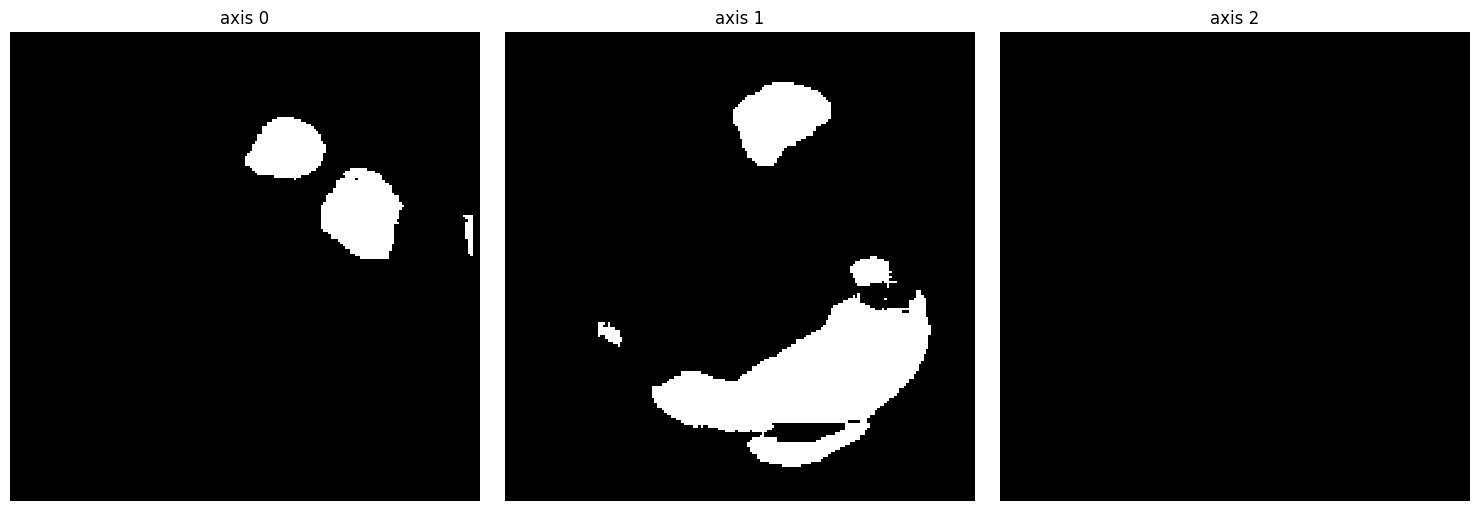

Hard Dice Coefficient: 0.07163533167789997
Soft Dice Coefficient: -0.5012429356575012


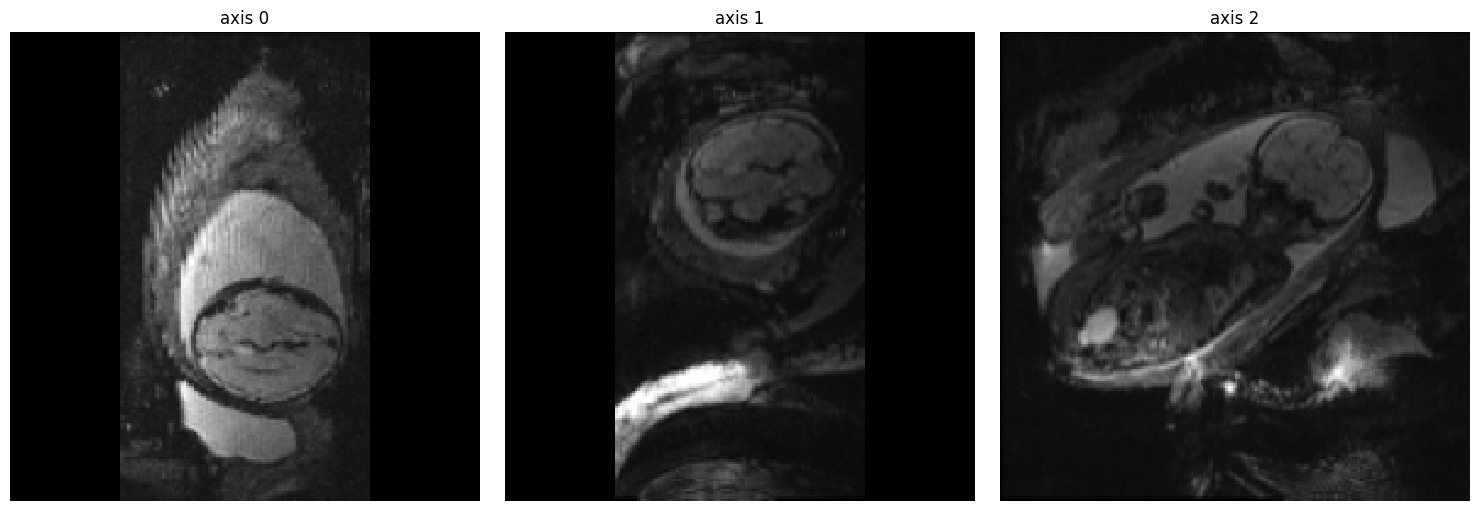

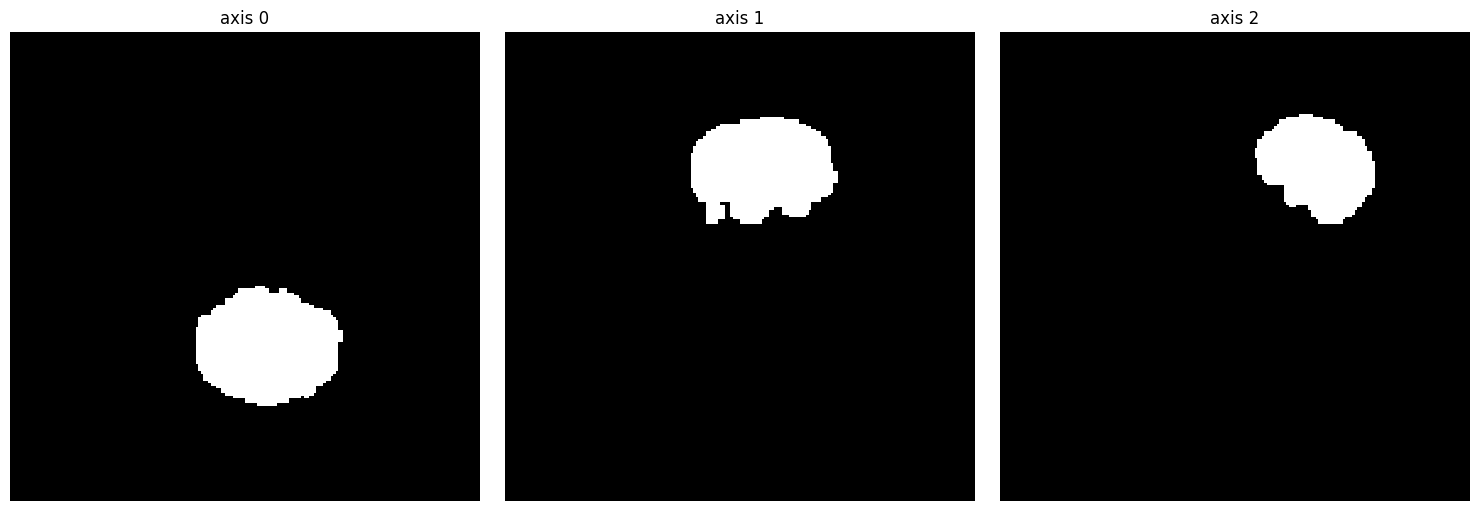

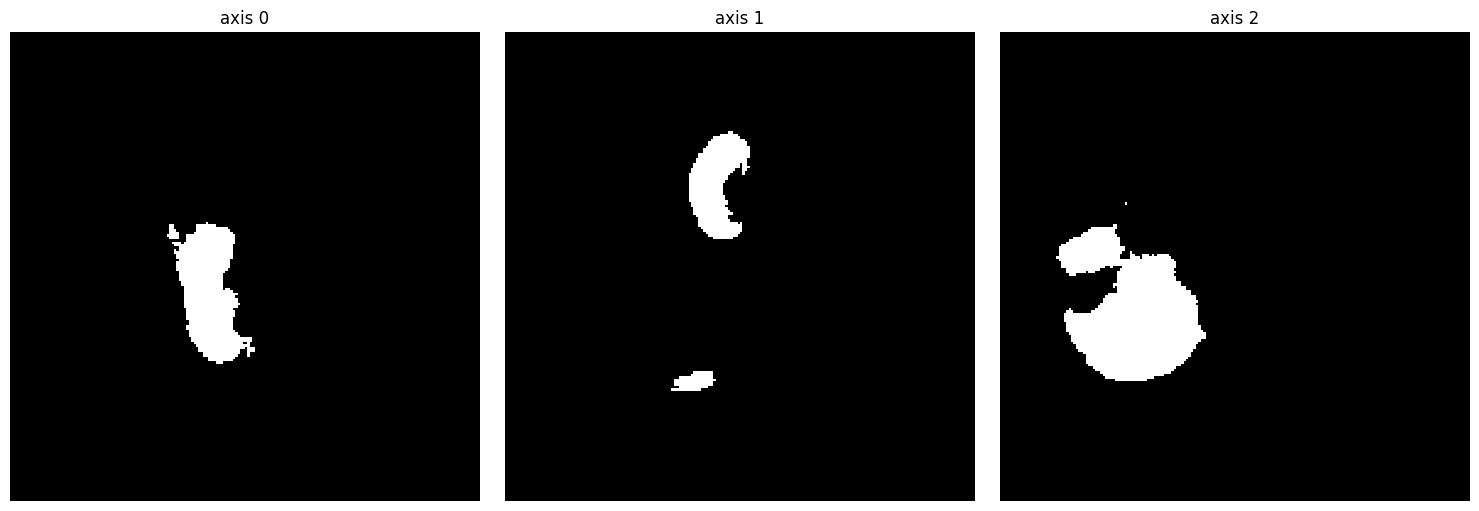

Hard Dice Coefficient: 0.0
Soft Dice Coefficient: -0.4907841682434082


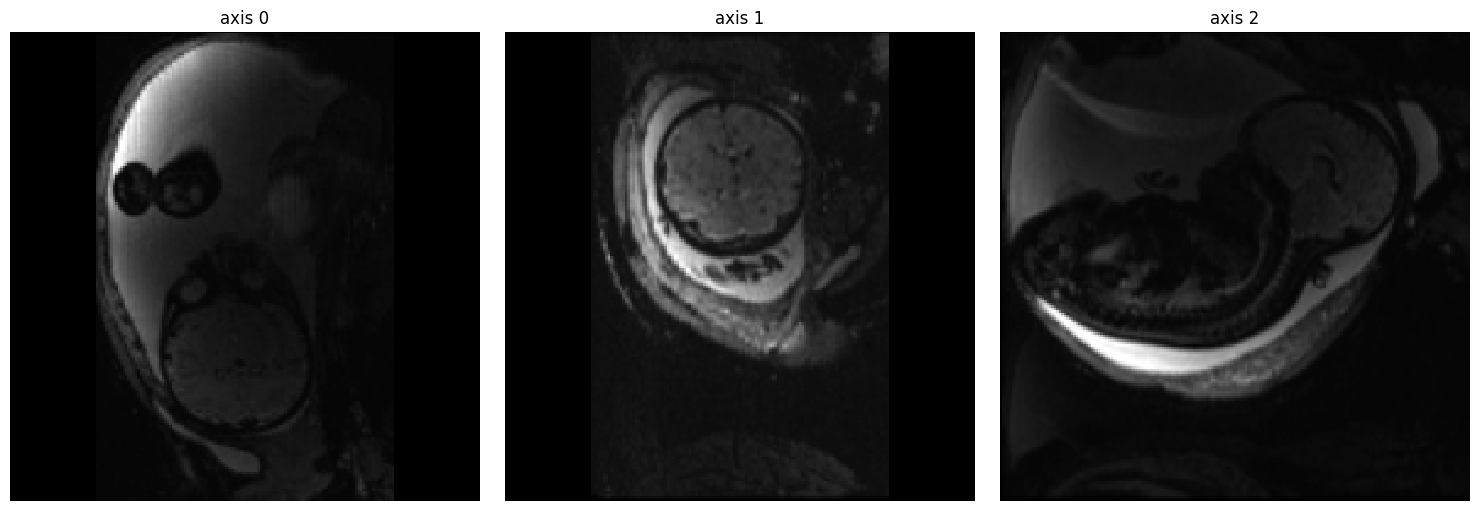

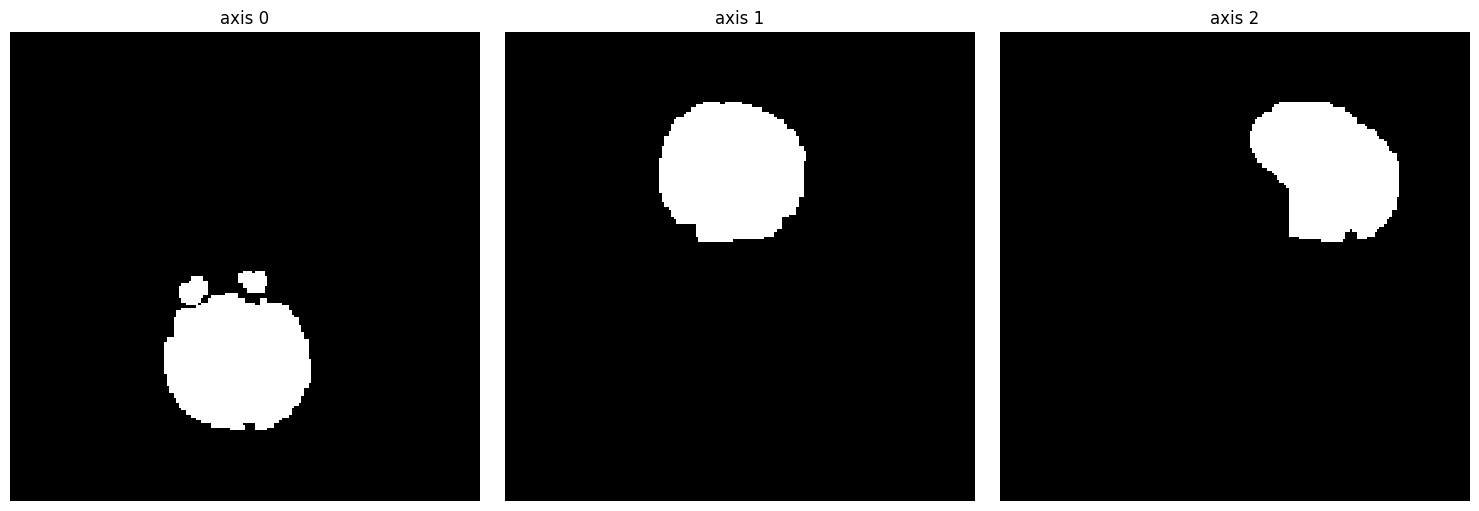

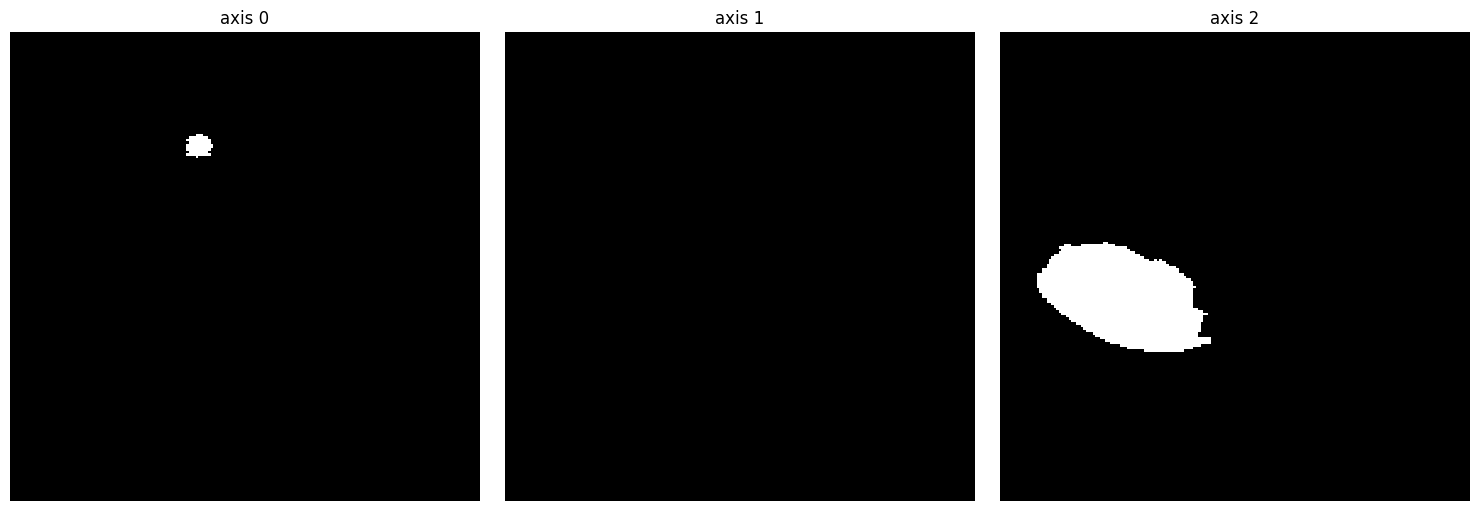

Hard Dice Coefficient: 0.16246393907894277
Soft Dice Coefficient: -0.5181349515914917


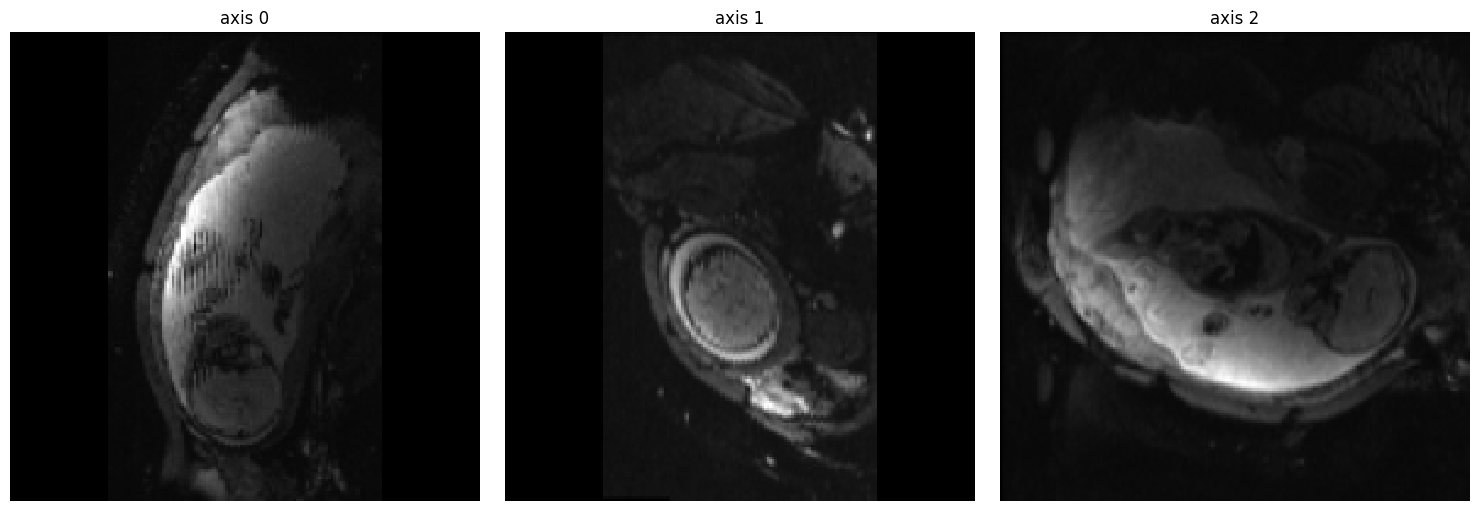

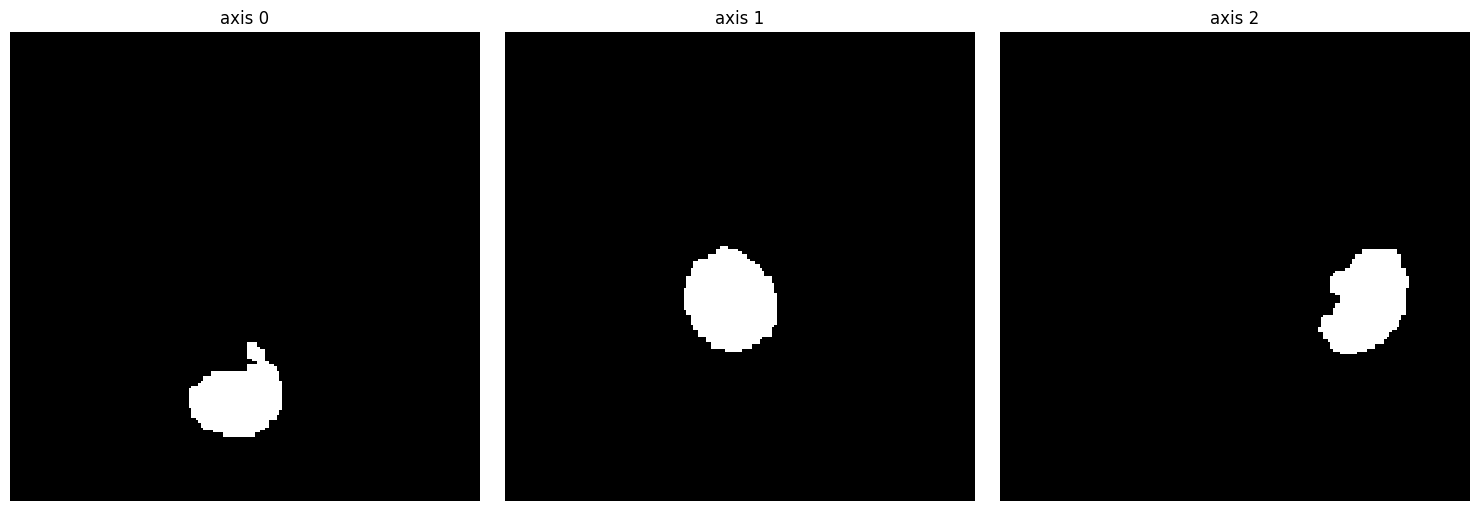

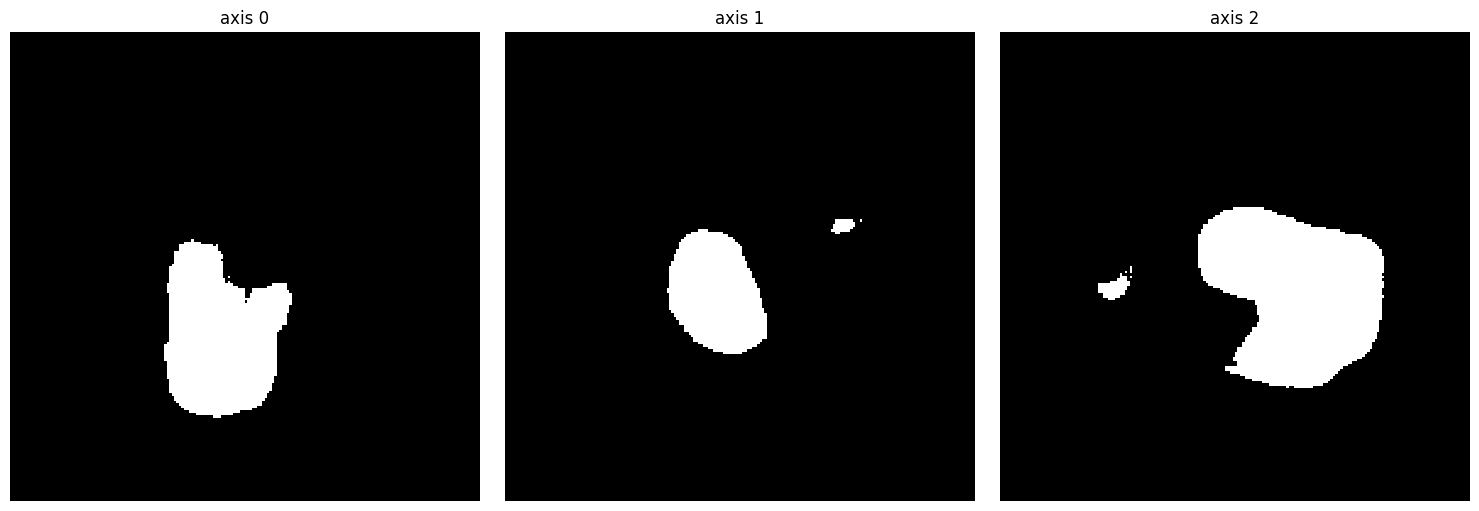

Hard Dice Coefficient: 0.15049229320614907
Soft Dice Coefficient: -0.5108615756034851


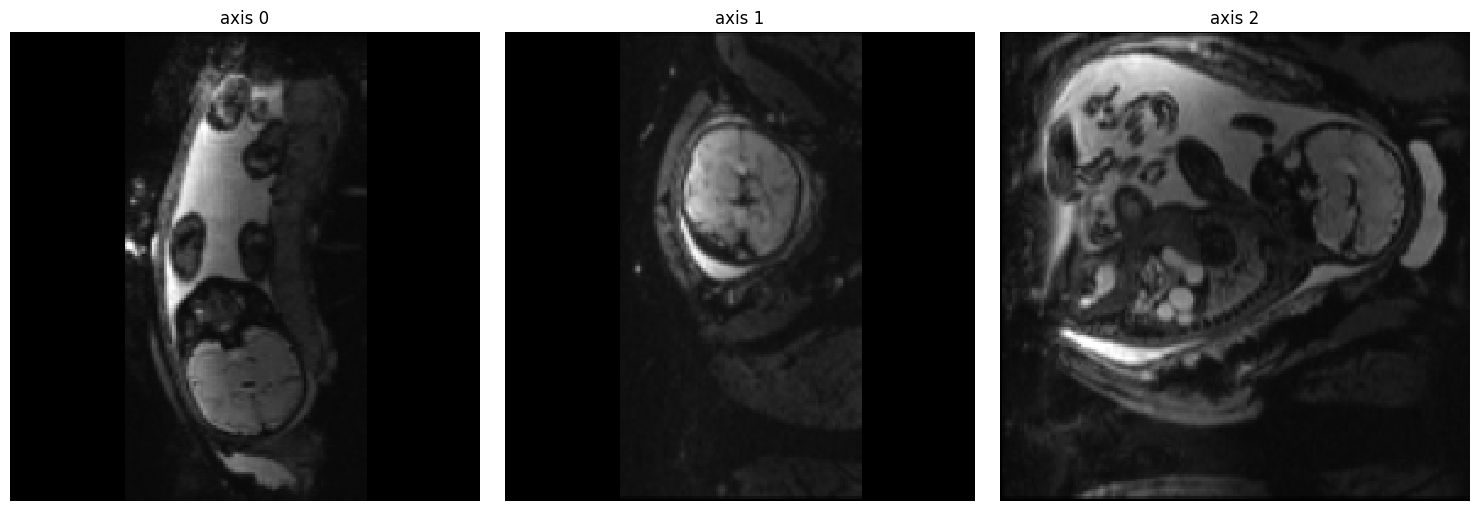

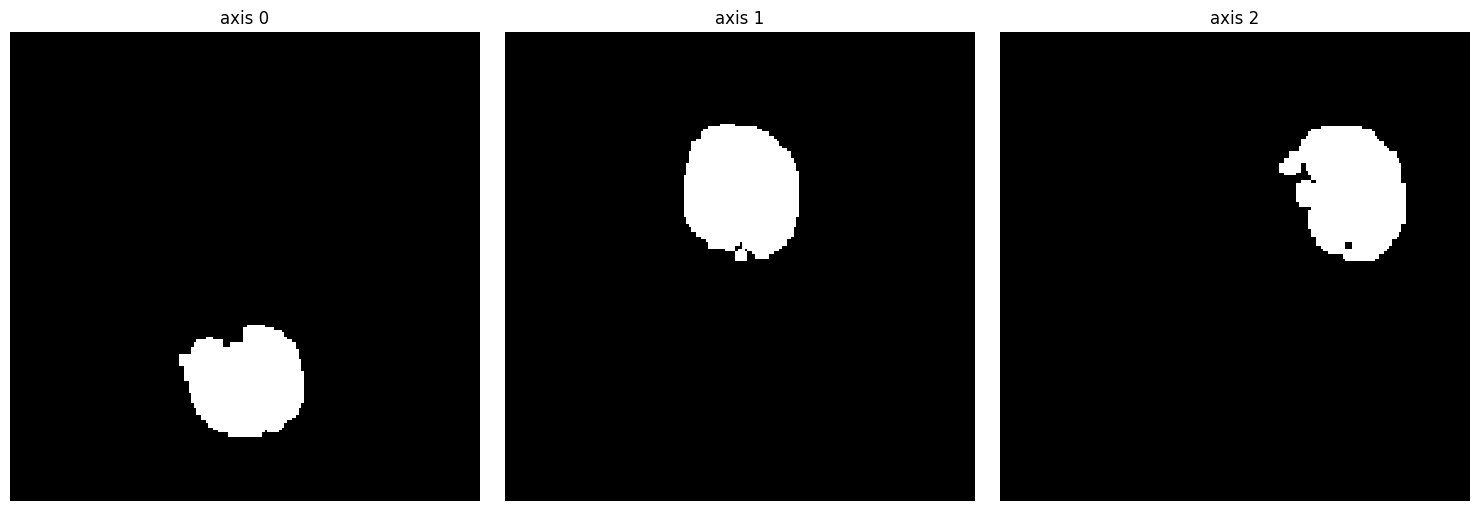

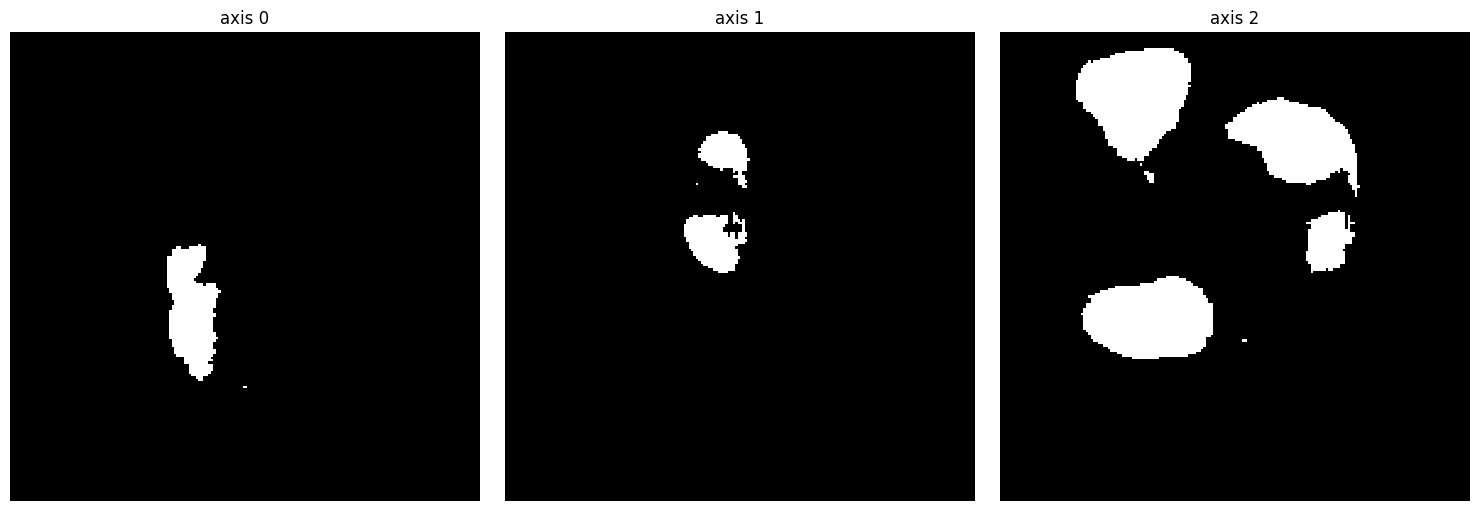

Hard Dice Coefficient: 0.0
Soft Dice Coefficient: -0.48997703194618225


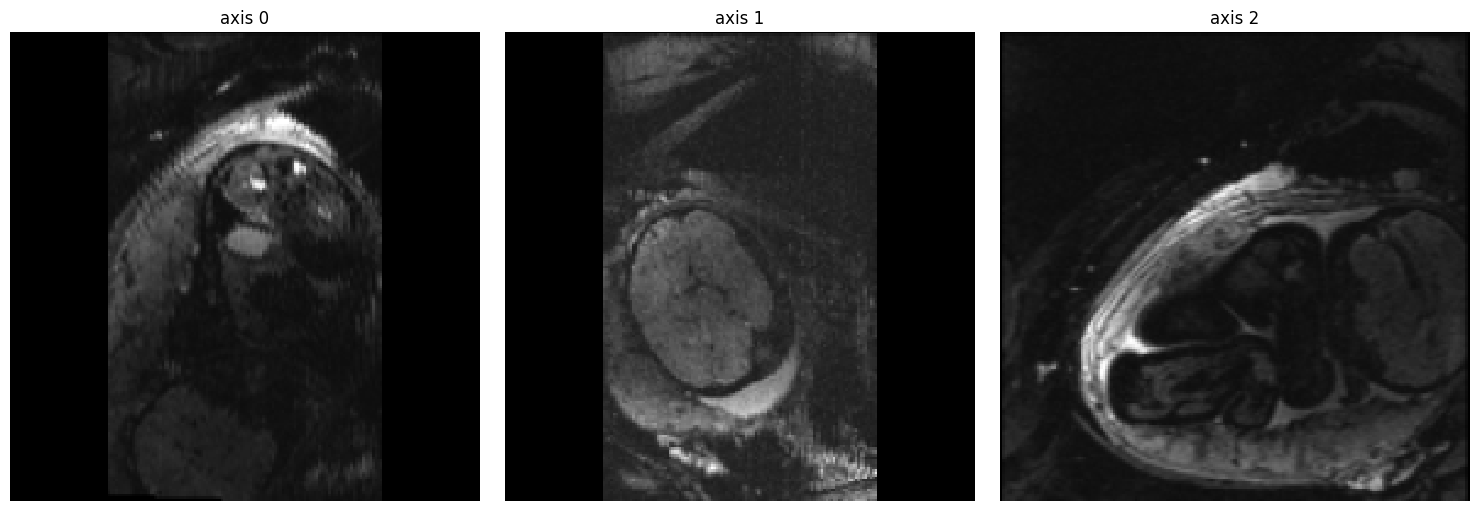

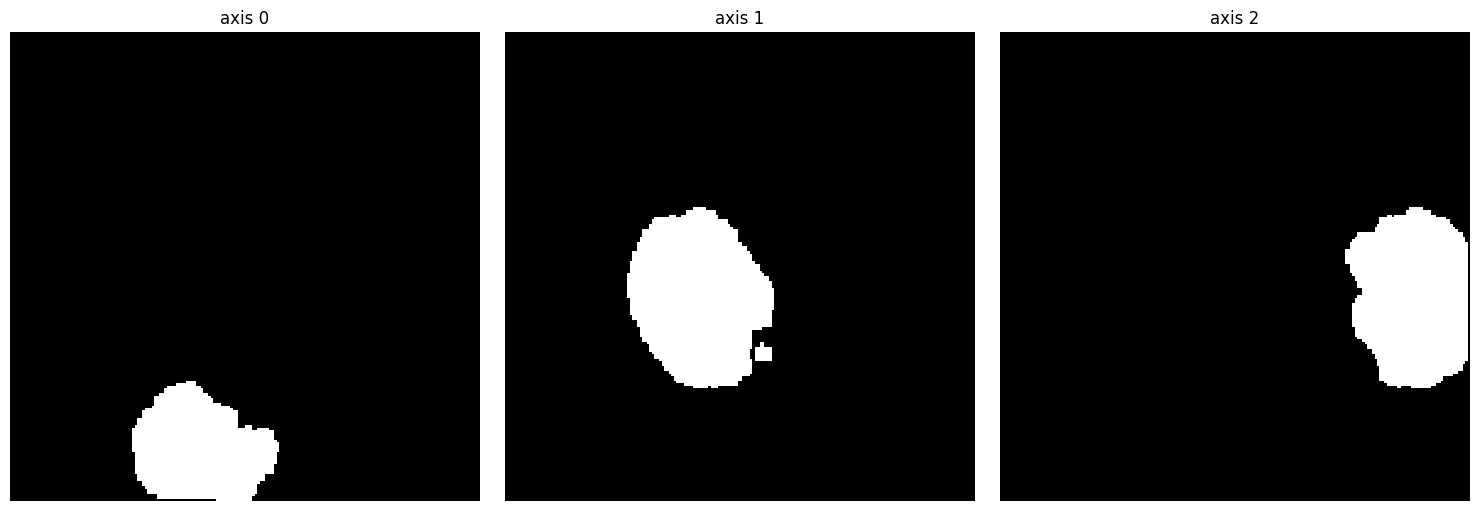

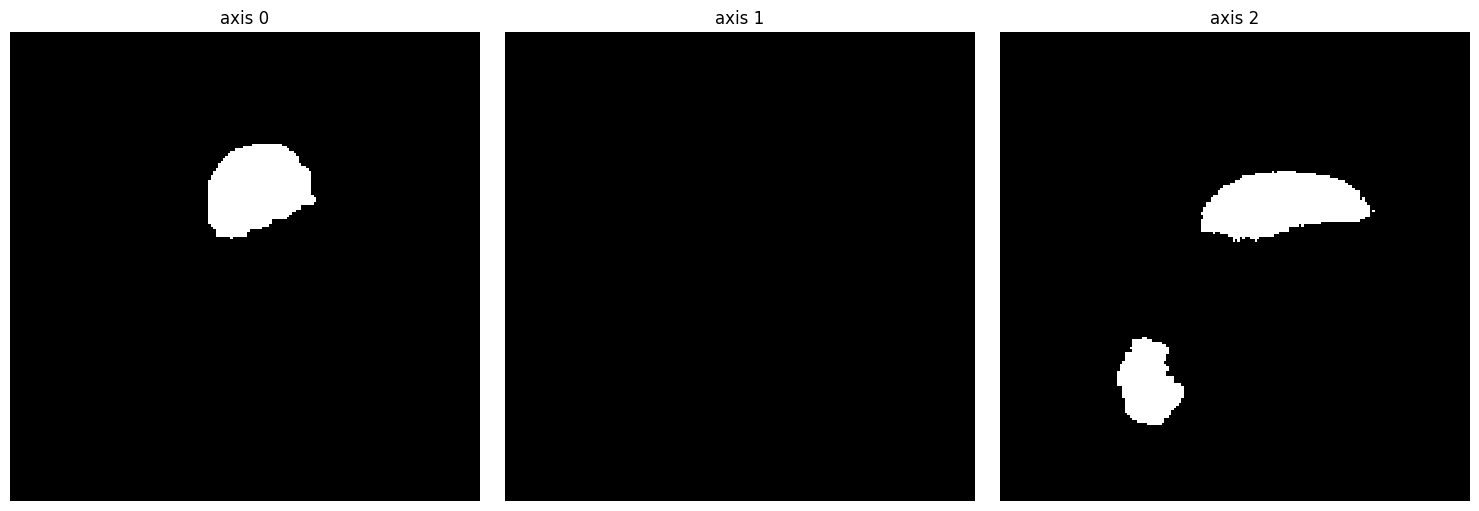

Hard Dice Coefficient: 0.048761372849292856
Soft Dice Coefficient: -0.4944564998149872


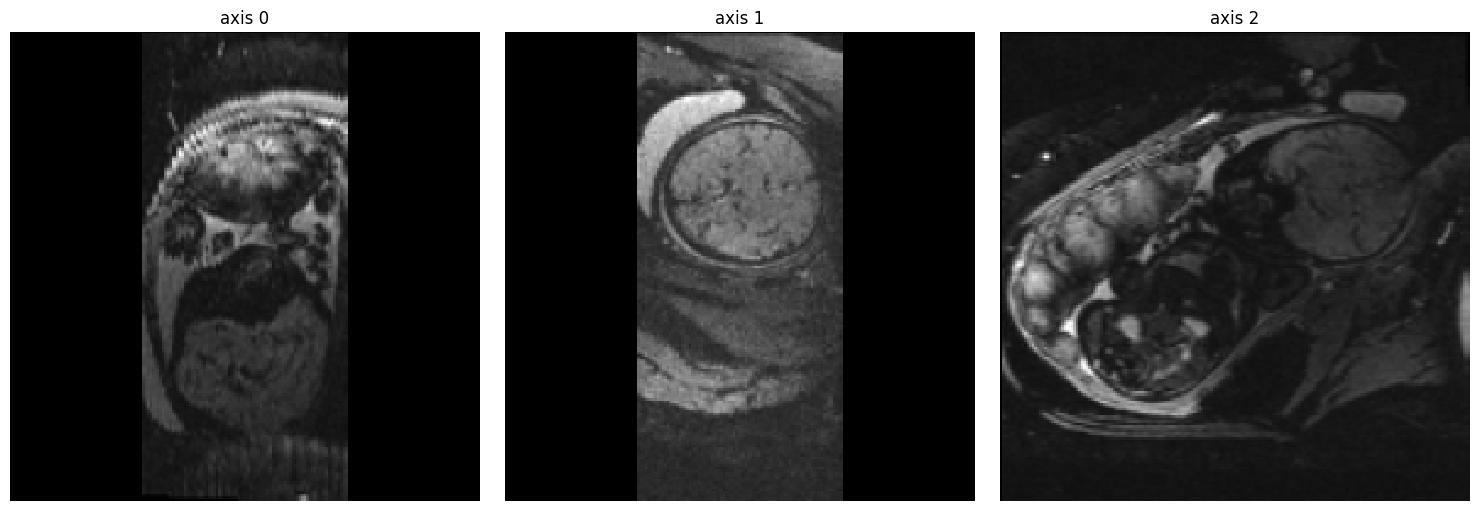

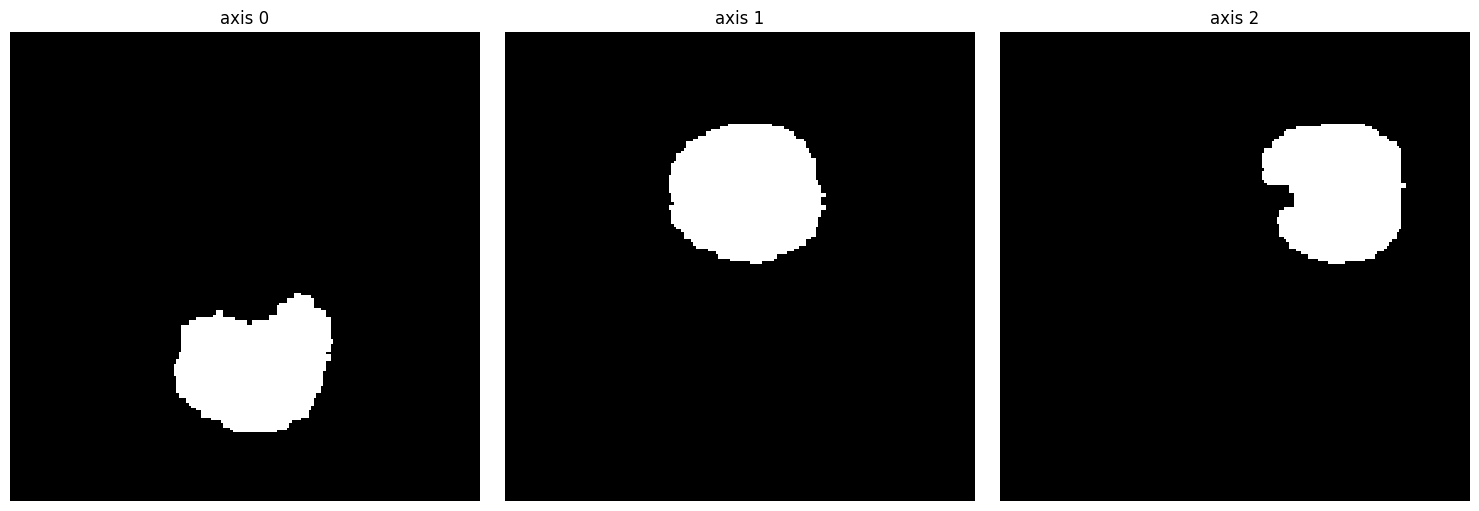

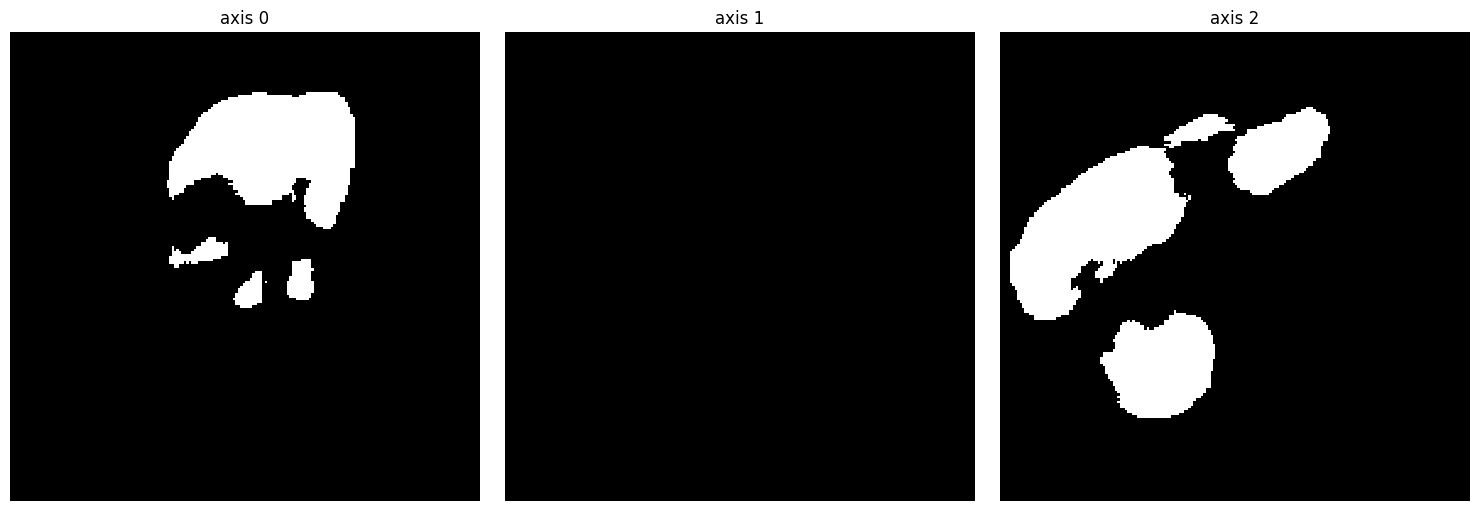

Hard Dice Coefficient: 0.24836728227875268
Soft Dice Coefficient: -0.5190631151199341


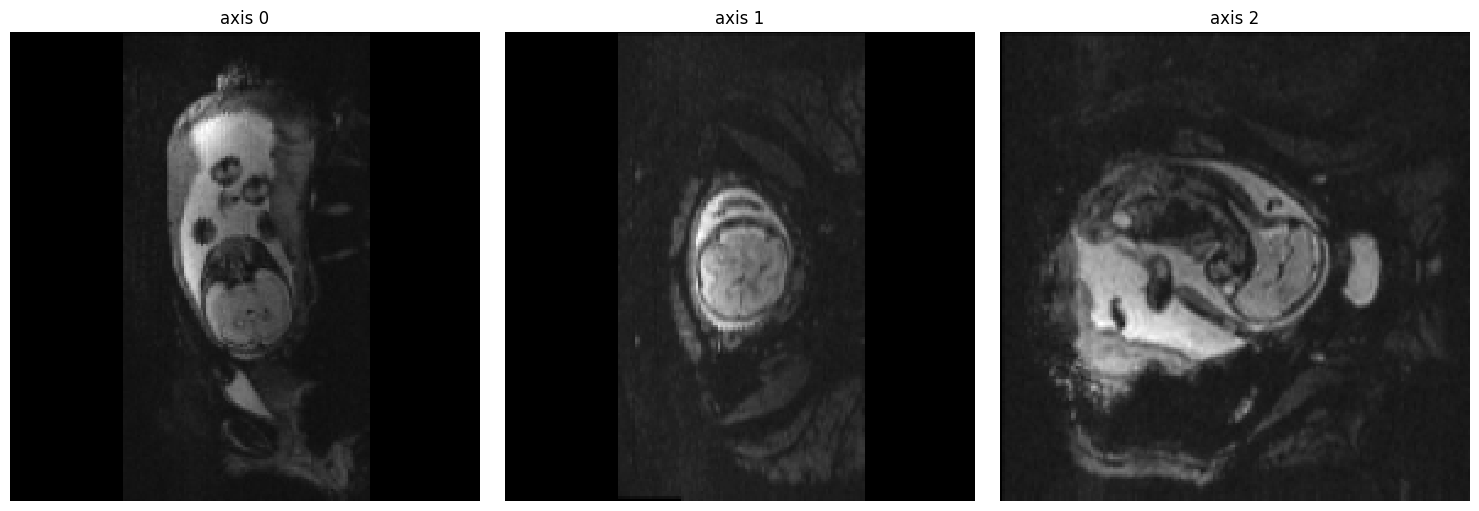

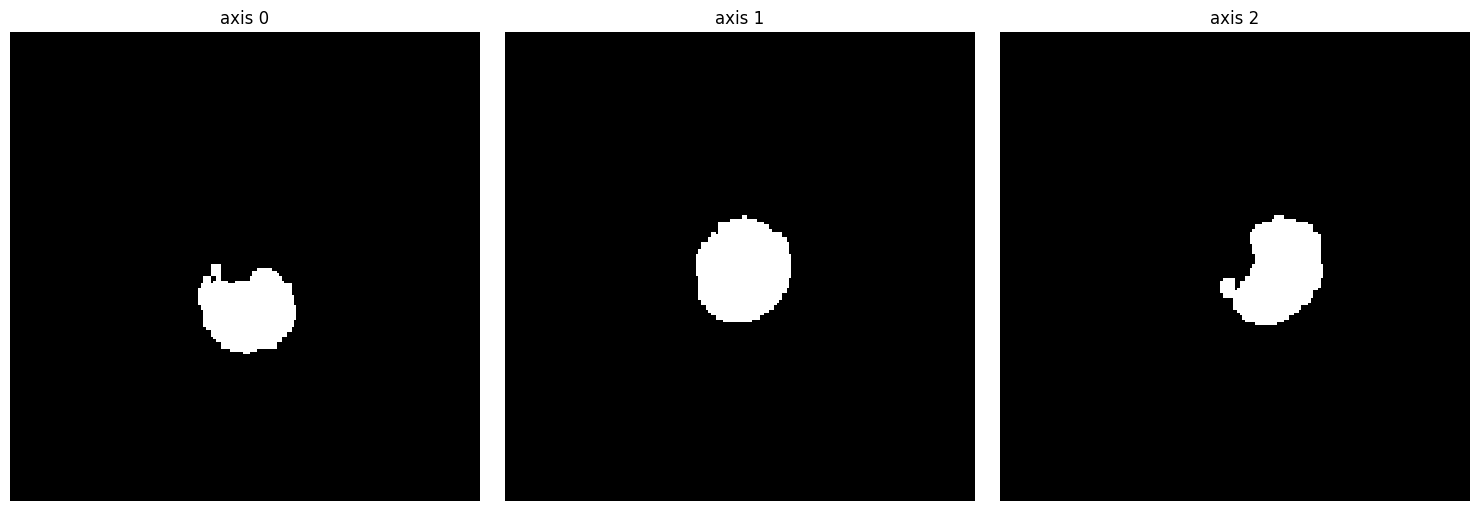

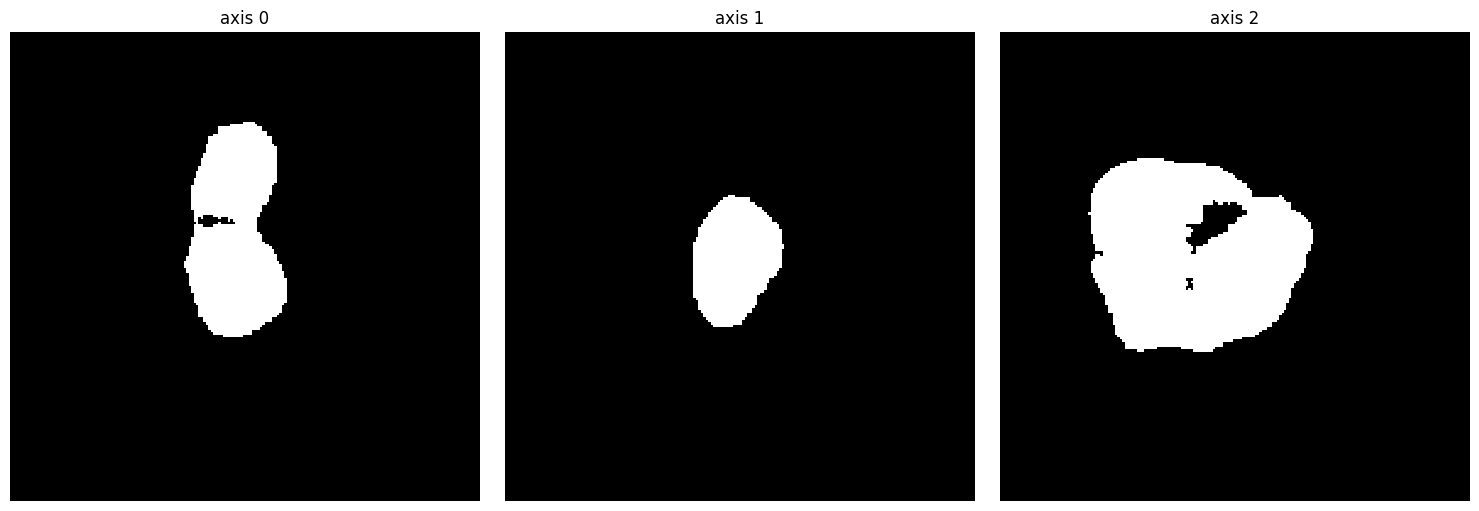

Hard Dice Coefficient: 0.21202304682047257
Soft Dice Coefficient: -0.5295213460922241


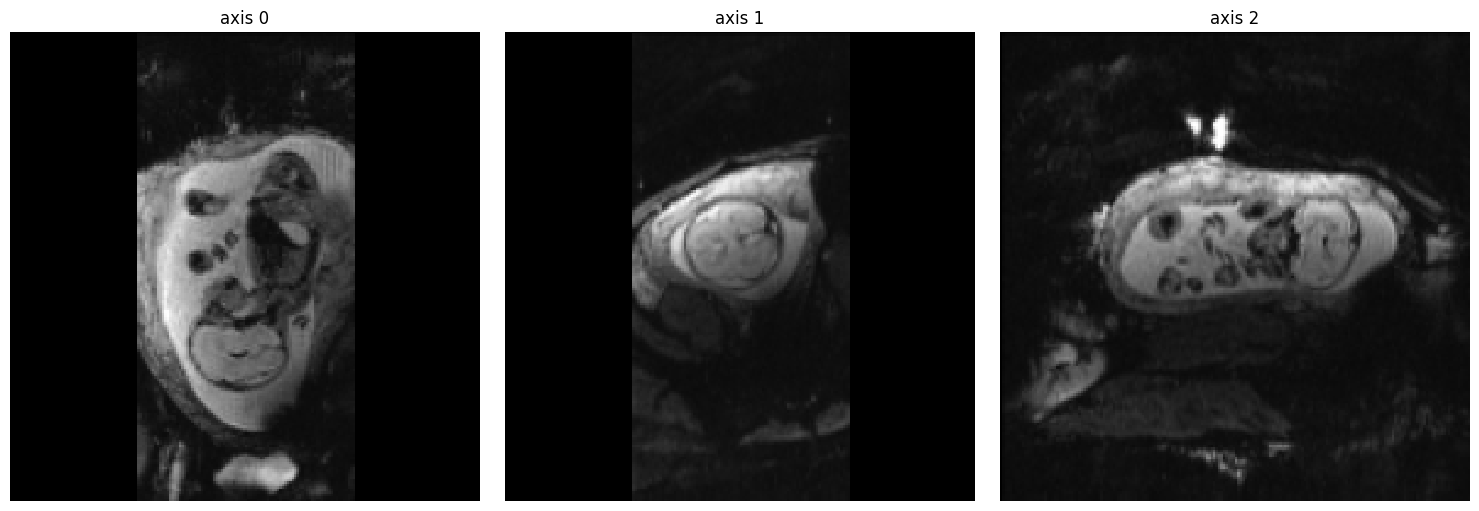

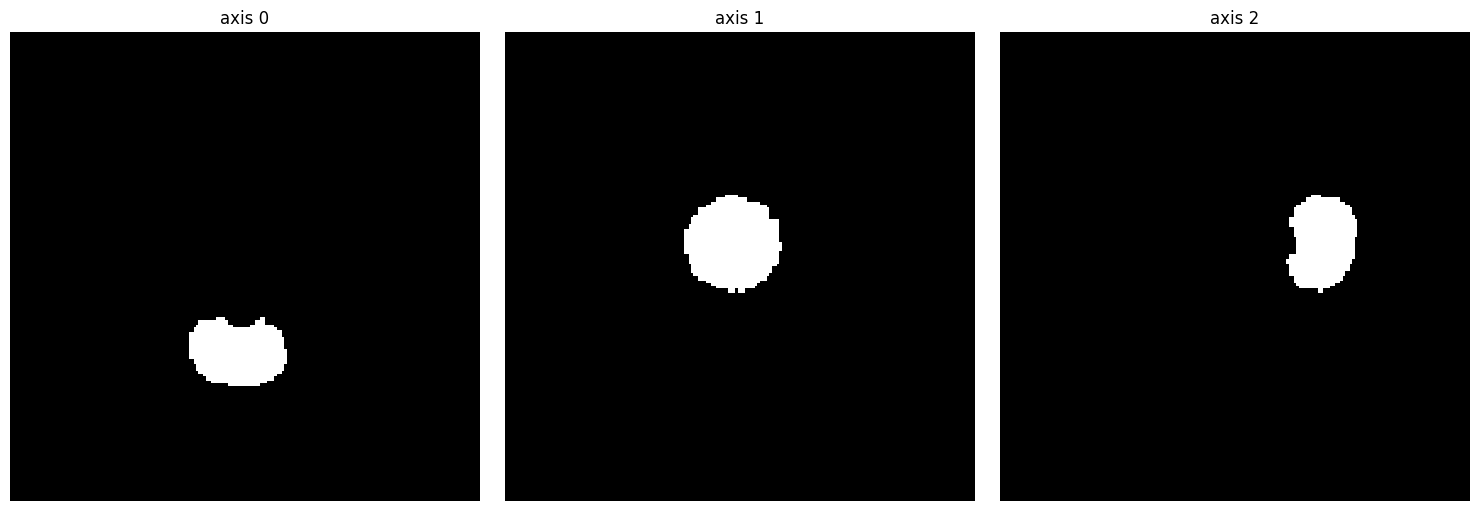

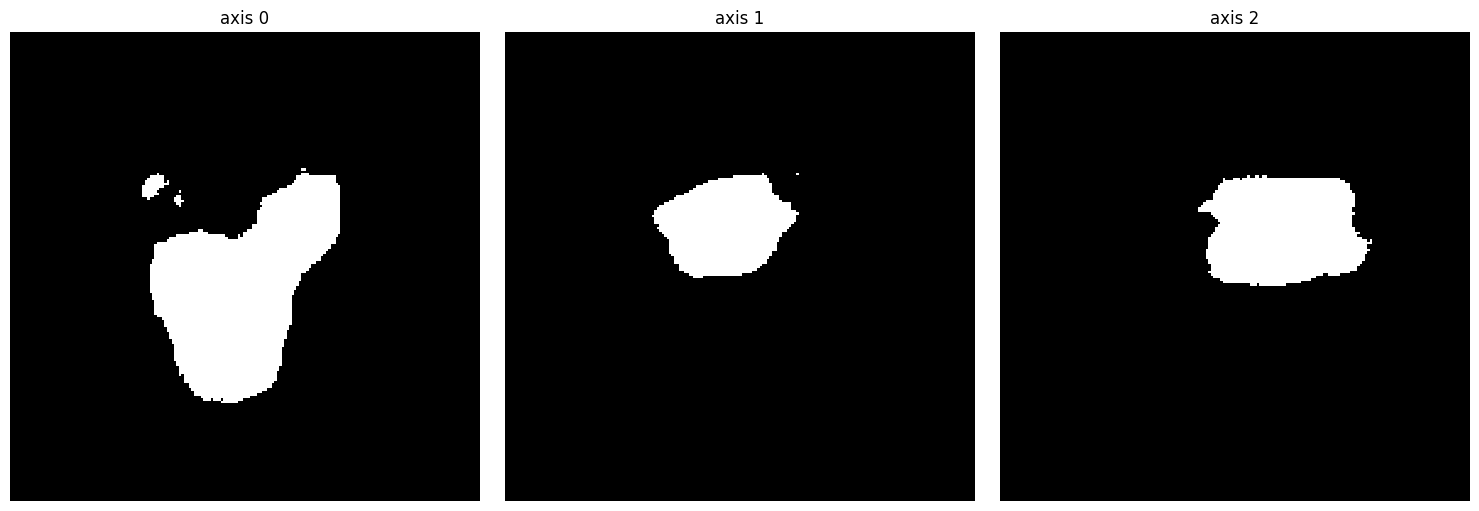

Hard Dice Coefficient: 0.020848123432249514
Soft Dice Coefficient: -0.4932028353214264


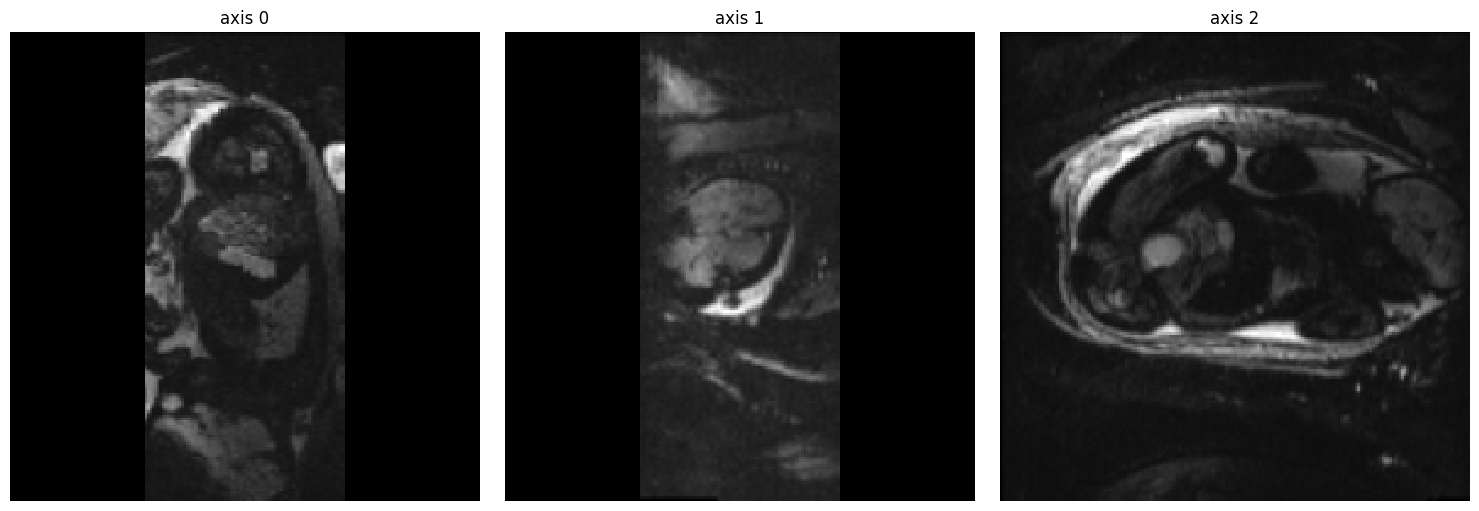

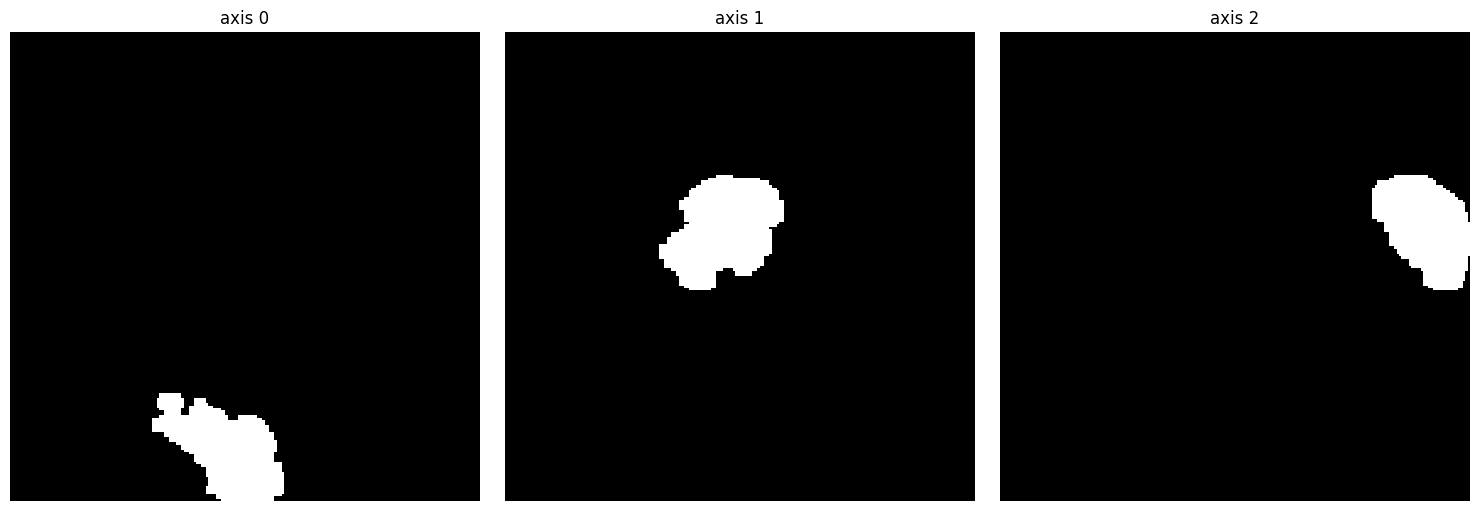

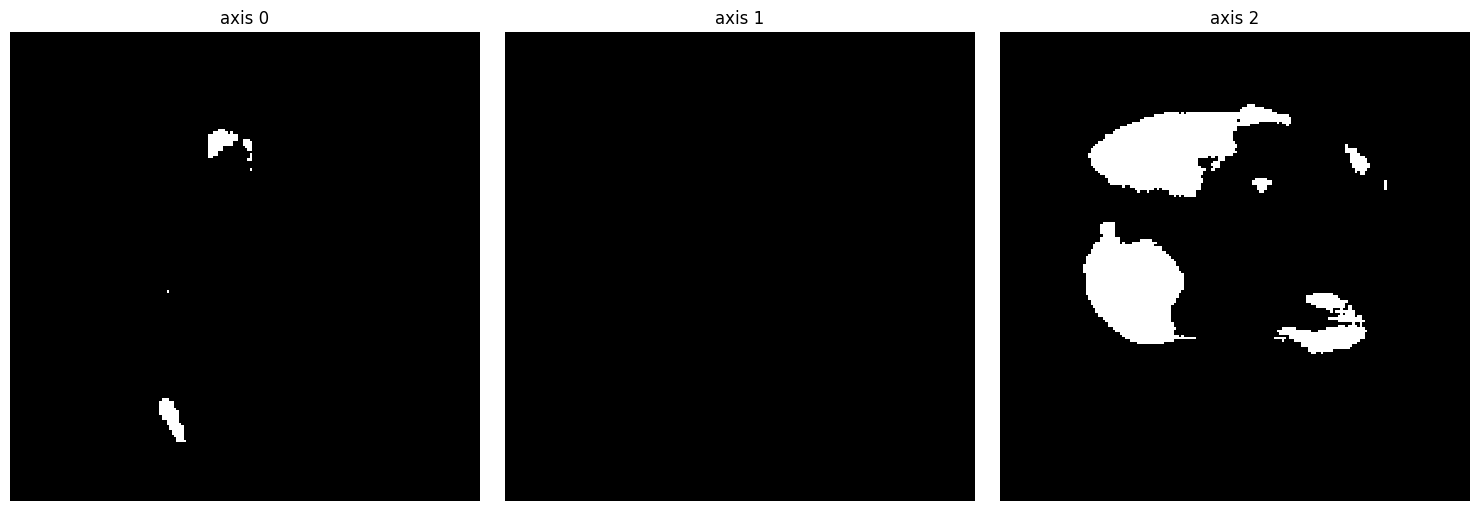

Hard Dice Coefficient: 0.18385001041312155
Soft Dice Coefficient: -0.5109059810638428


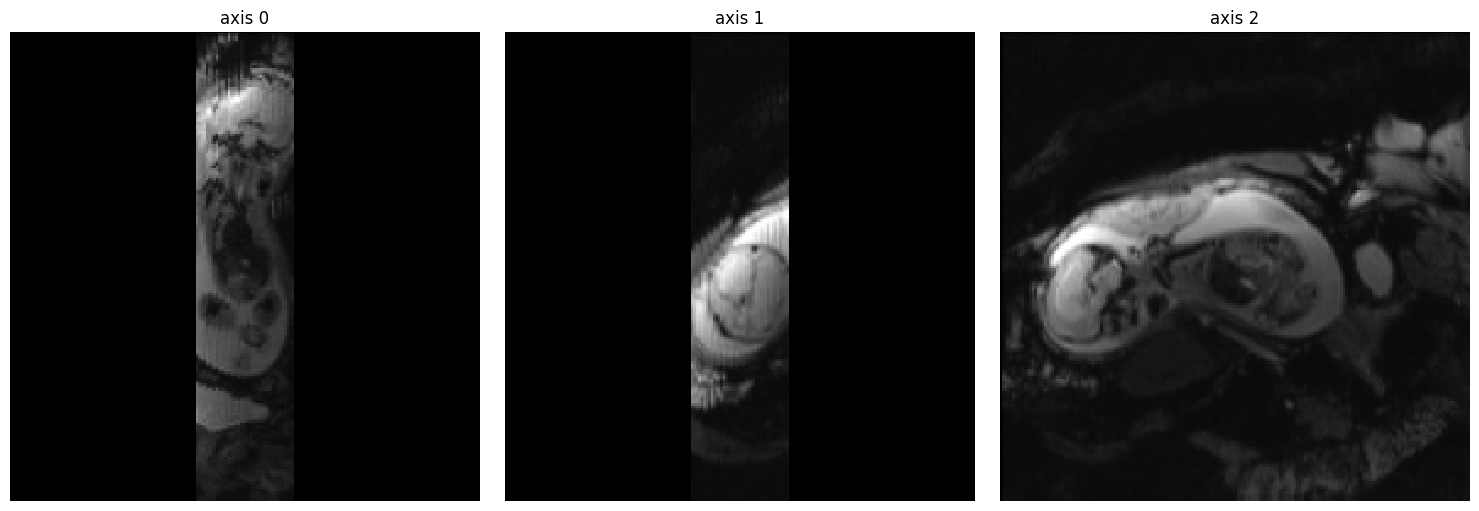

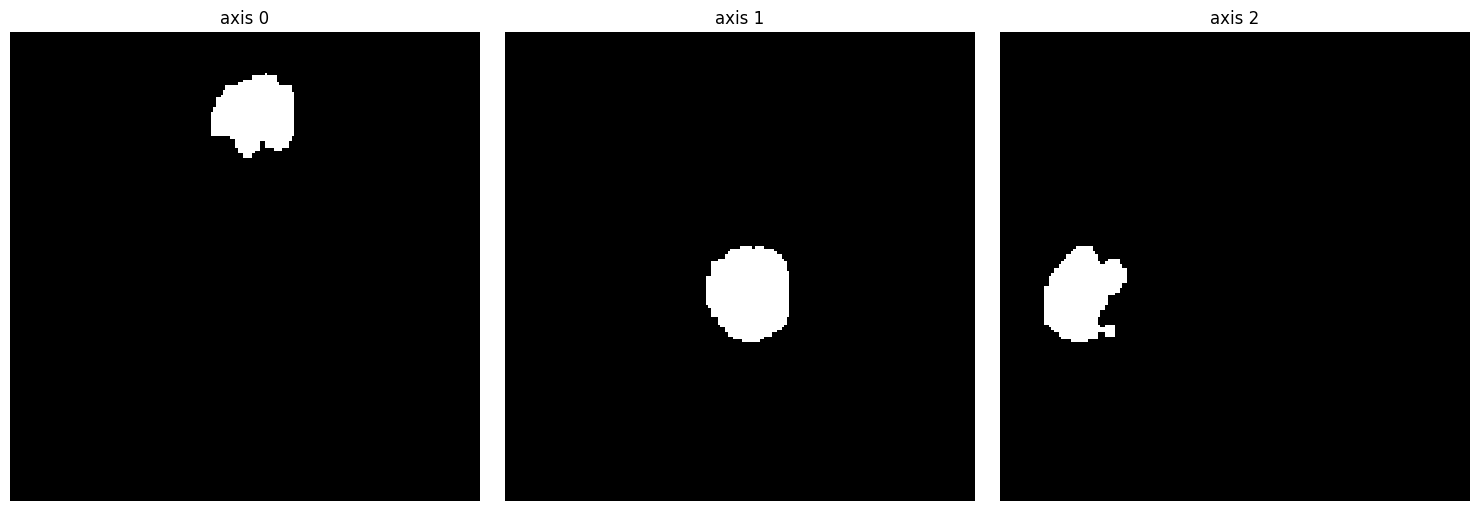

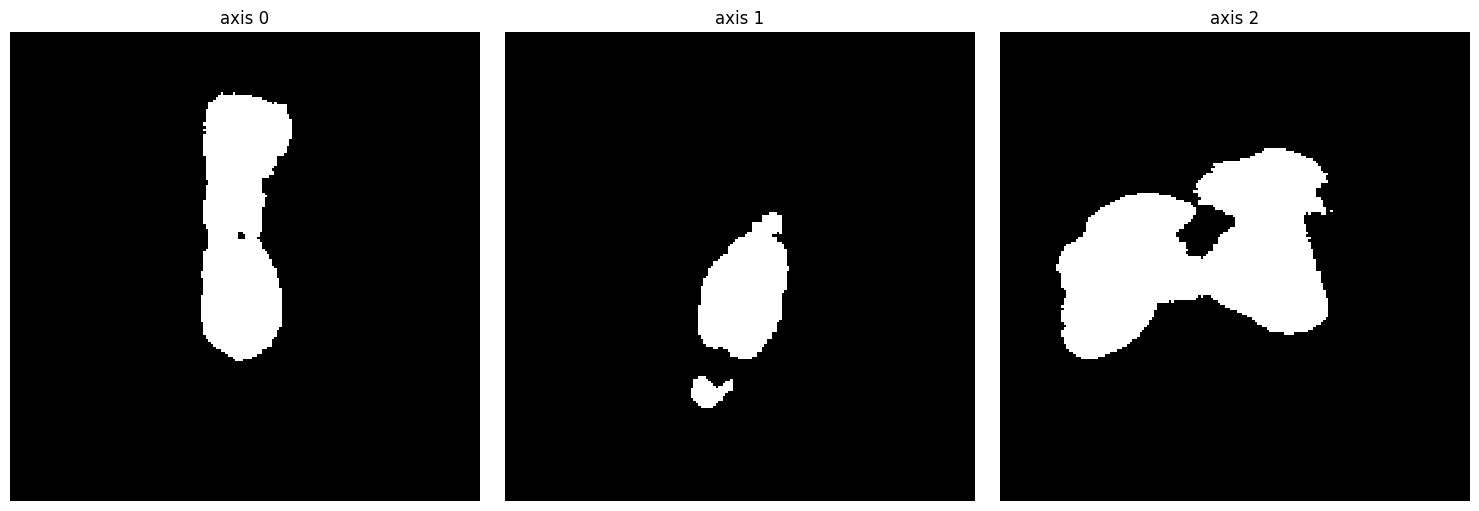

Hard Dice Coefficient: 0.25480082420638983
Soft Dice Coefficient: -0.5726675987243652


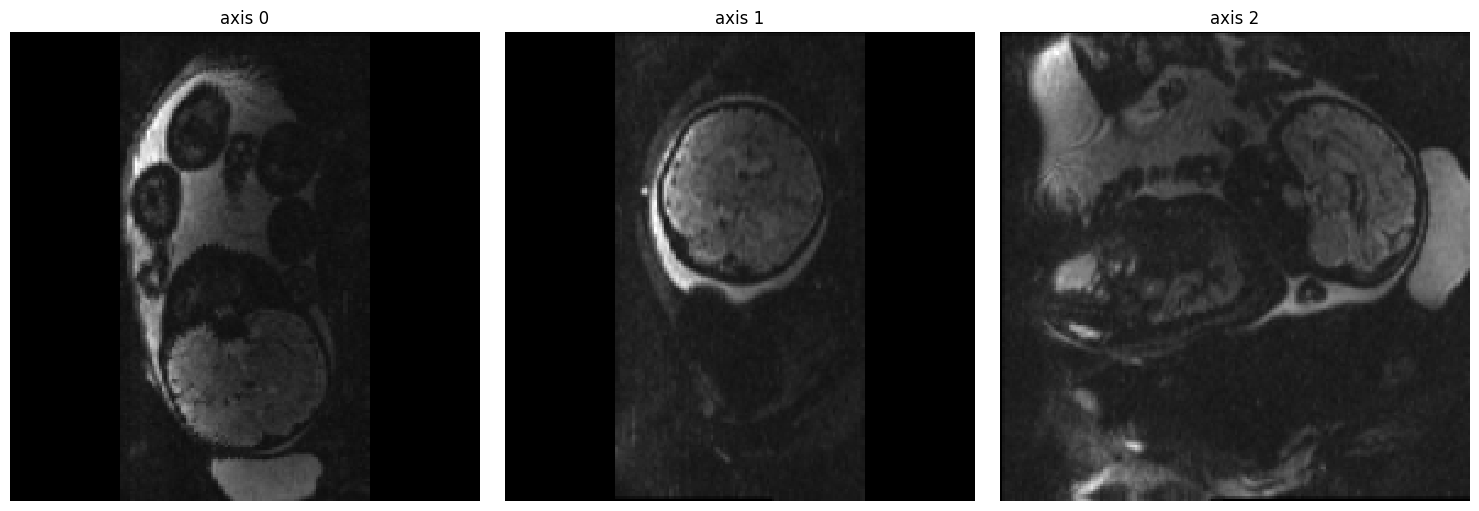

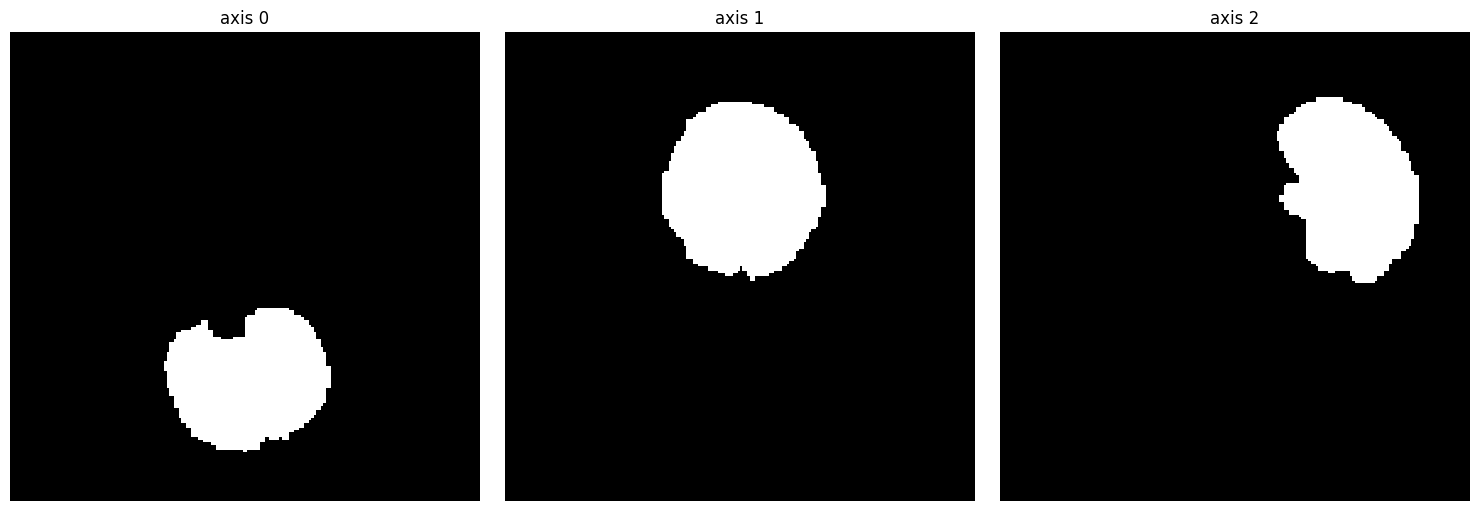

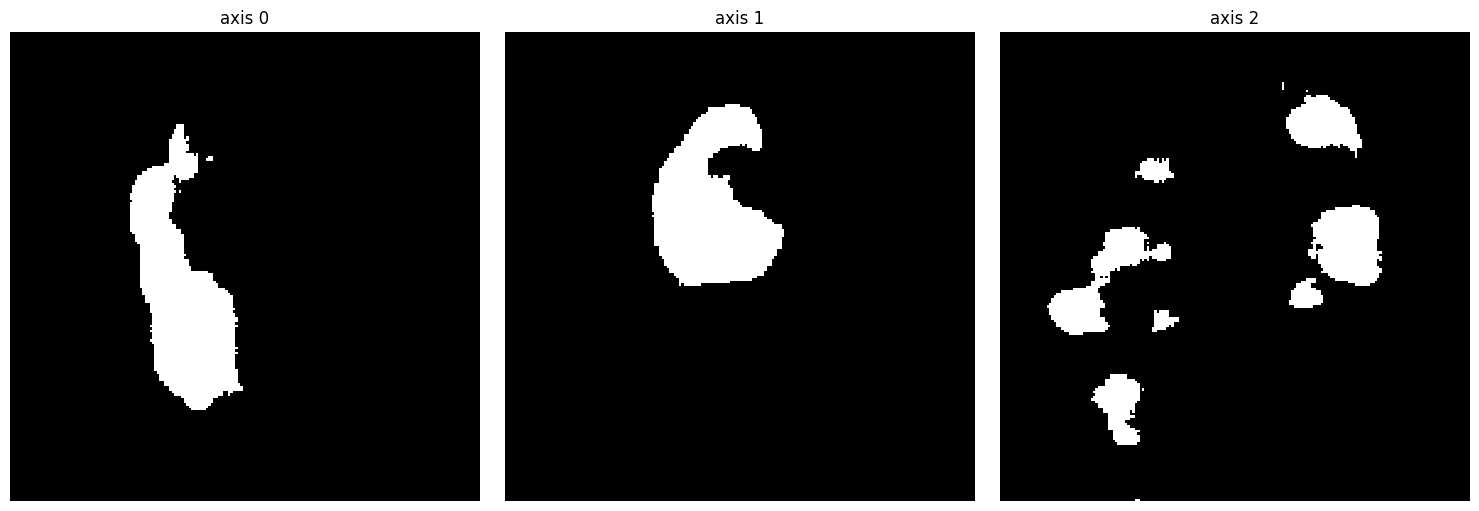

Hard Dice Coefficient: 0.20826175557544707
Soft Dice Coefficient: -0.5186248421669006


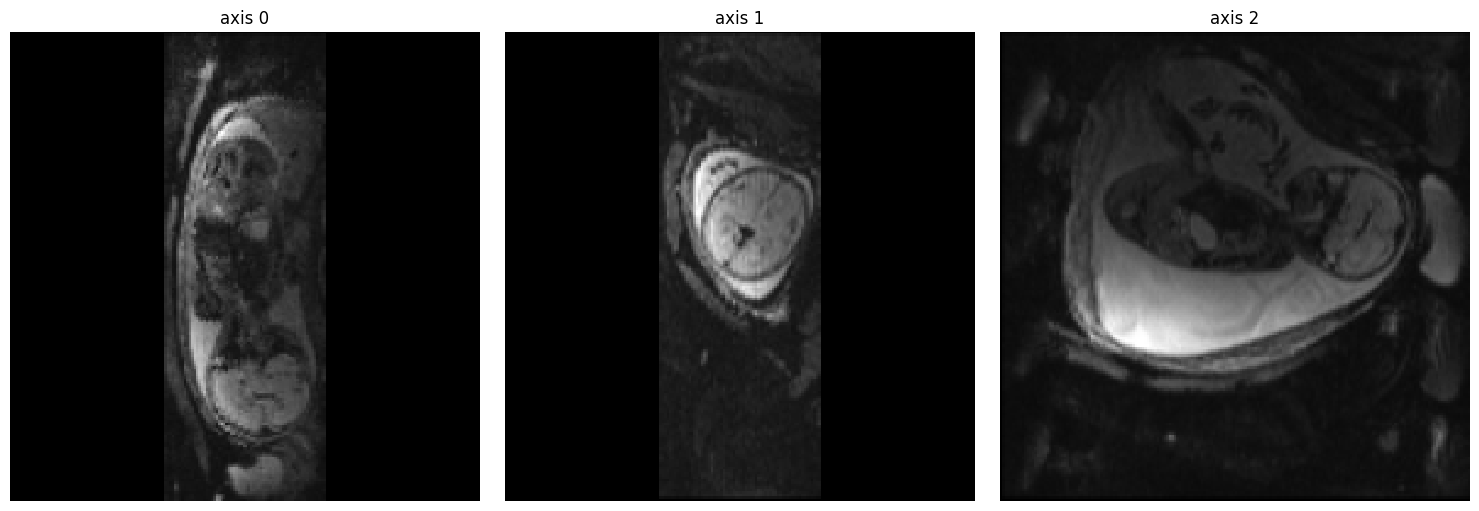

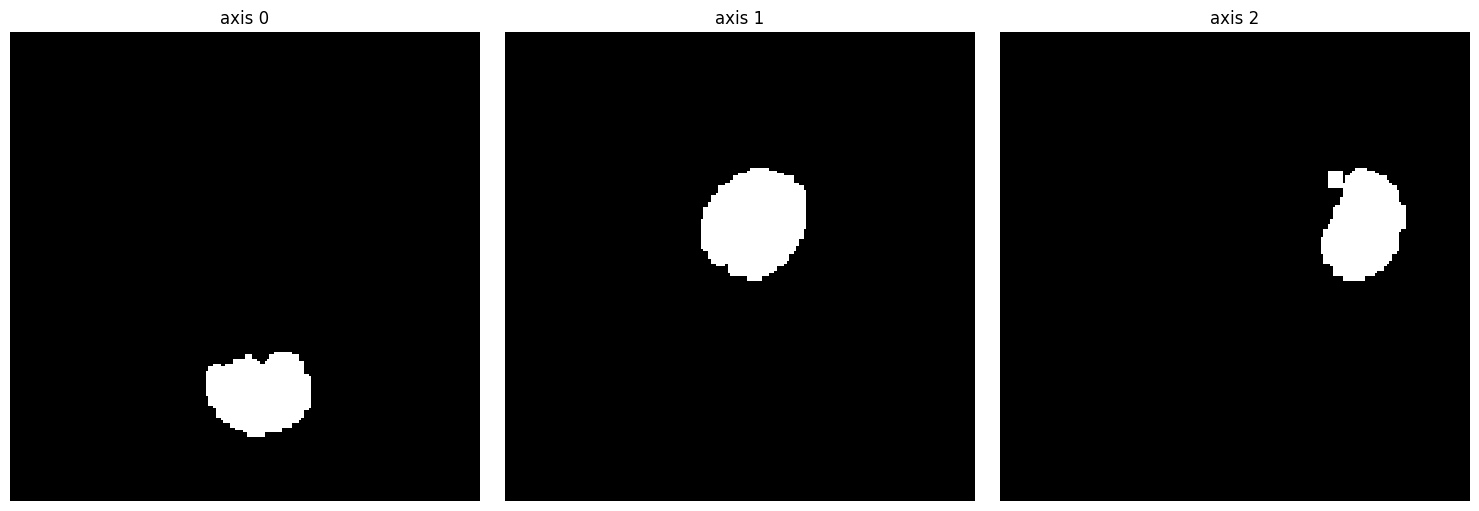

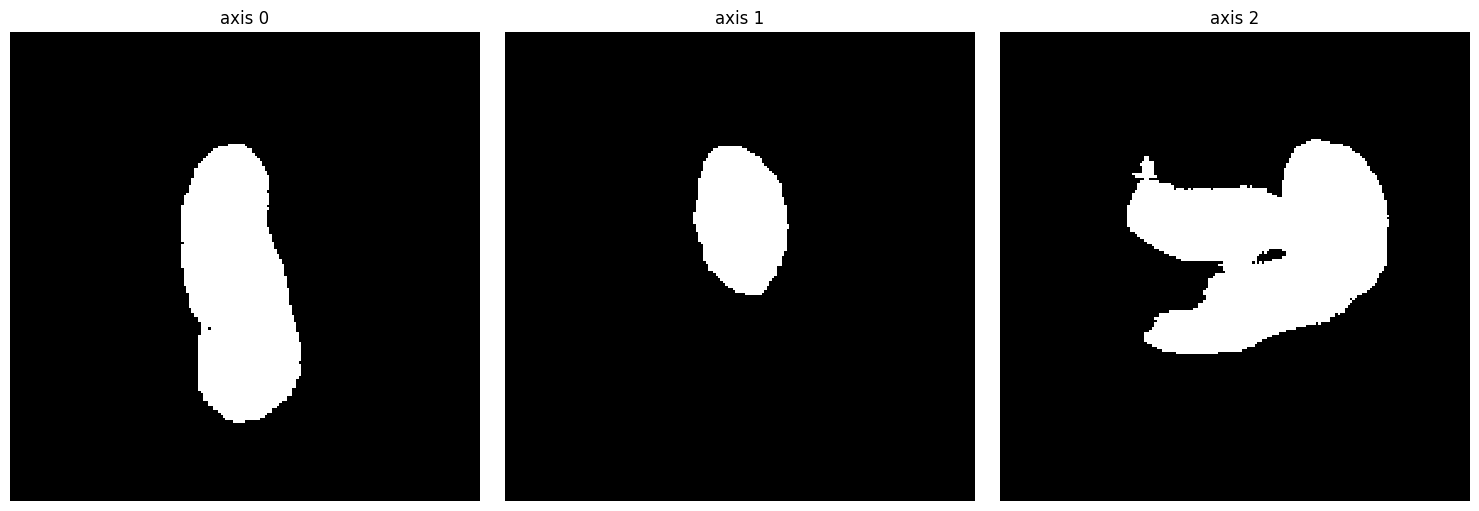

Hard Dice Coefficient: 0.0
Soft Dice Coefficient: -0.48835301399230957


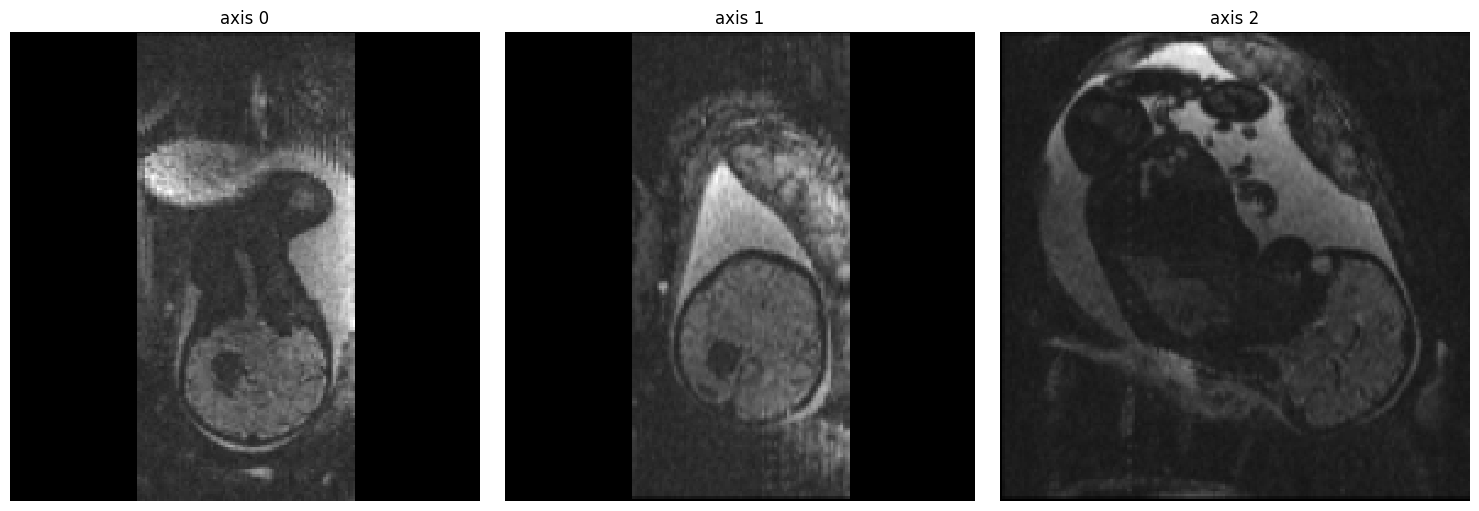

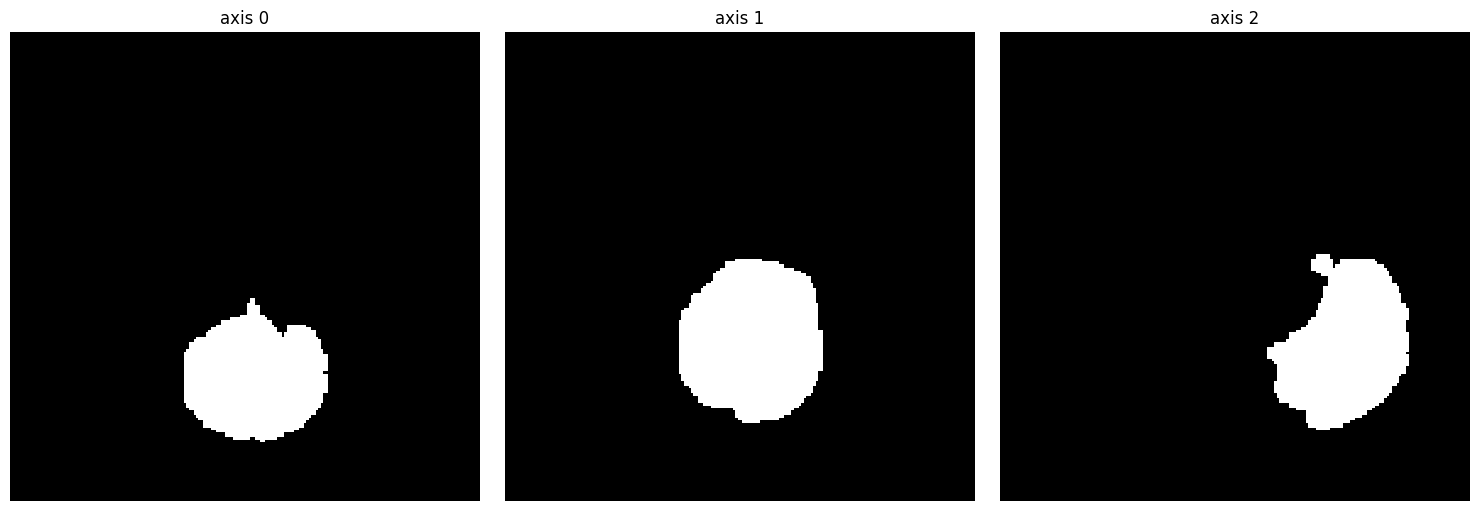

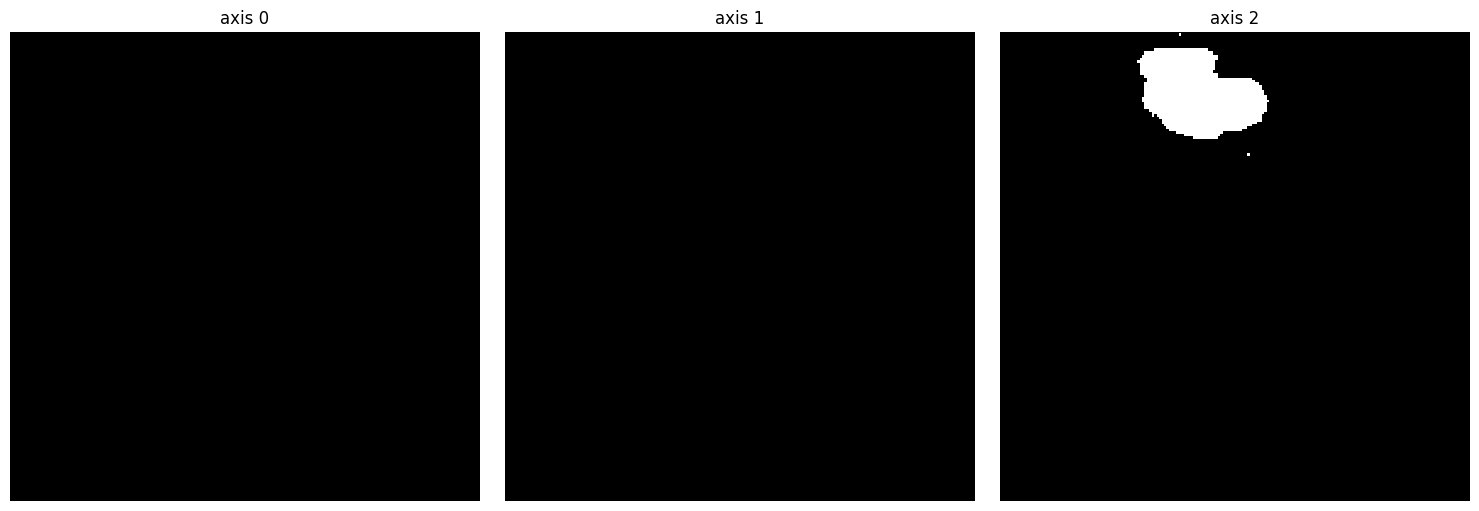

Hard Dice Coefficient: 0.05496669823944191
Soft Dice Coefficient: -0.4980778992176056


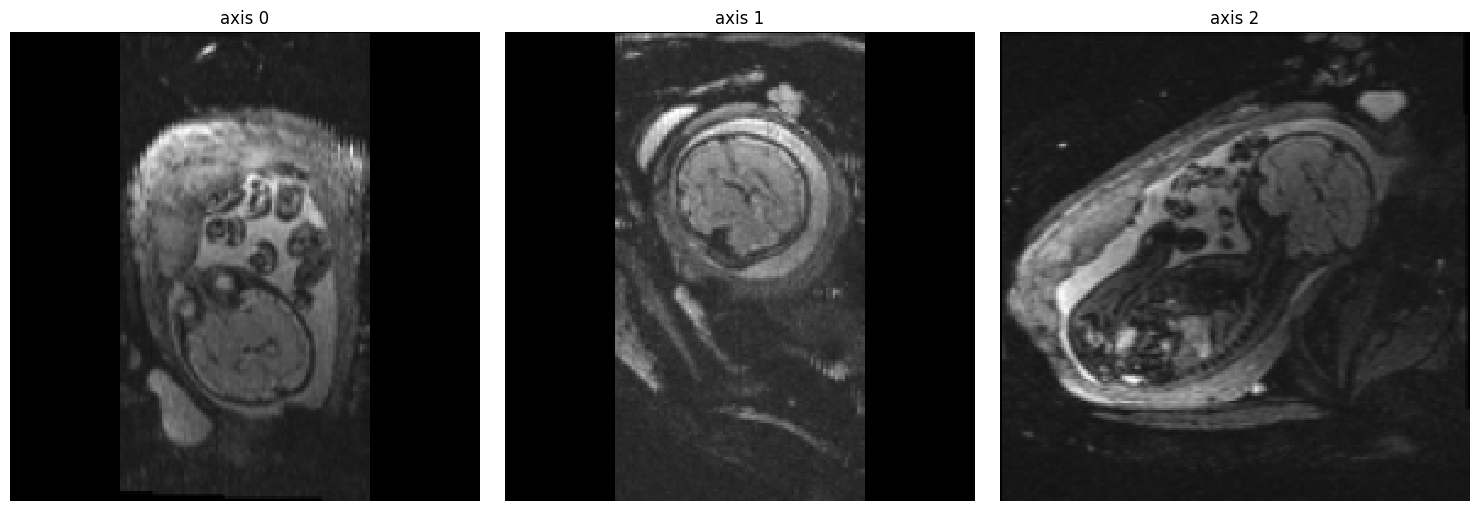

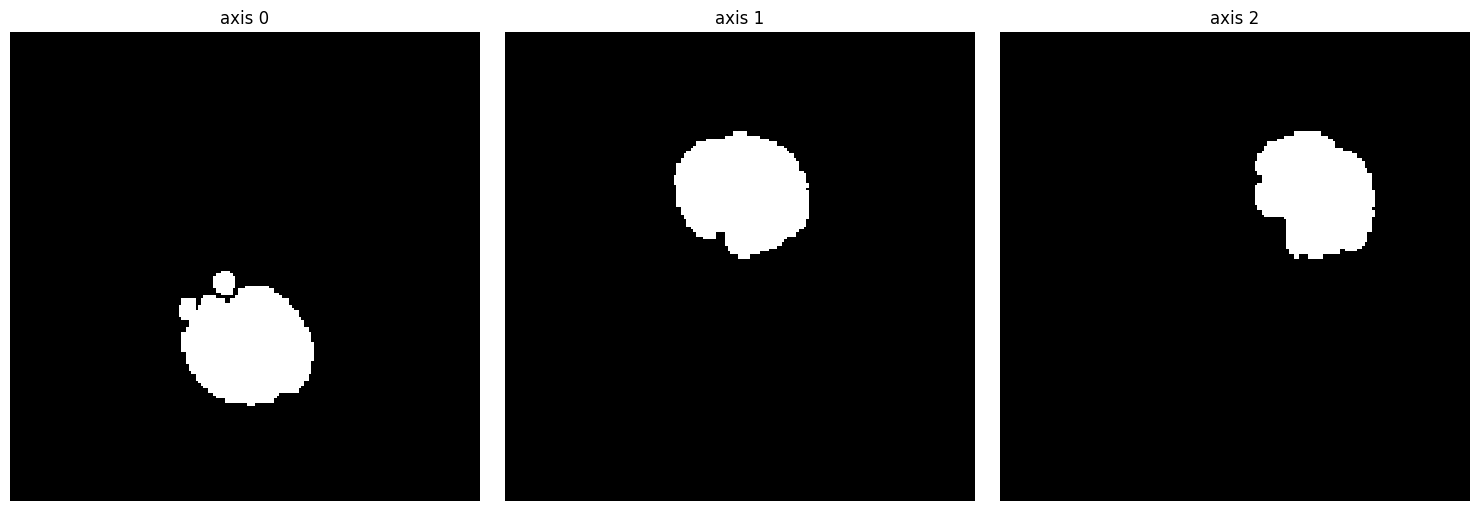

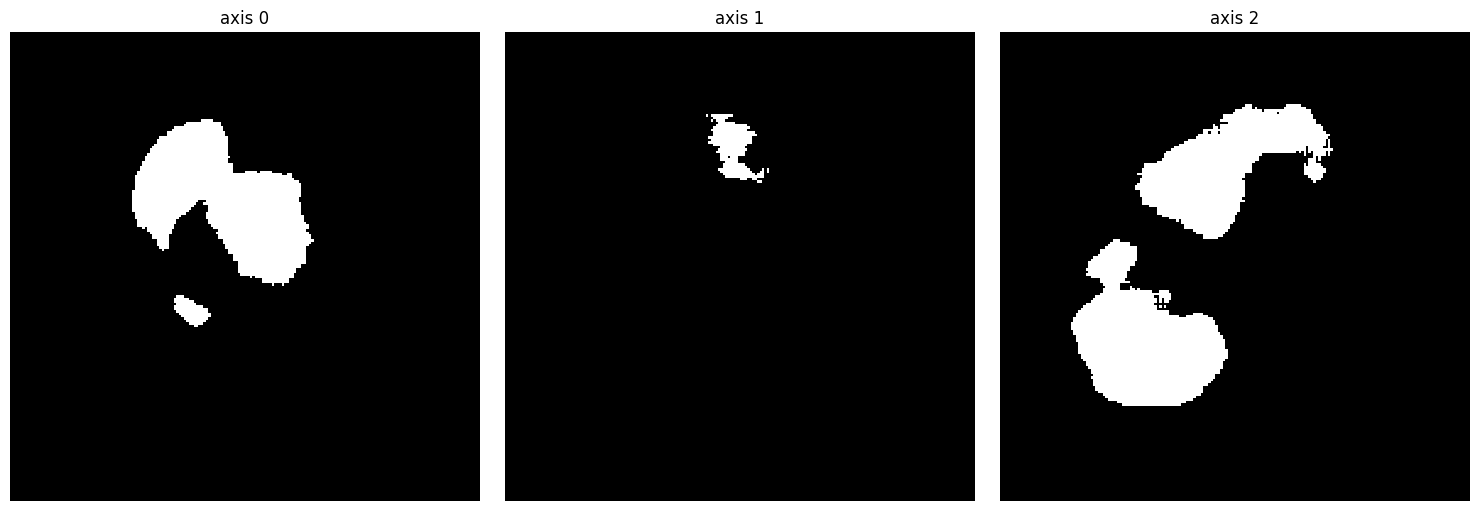

Hard Dice Coefficient: 0.16328195319531955
Soft Dice Coefficient: -0.5410978198051453


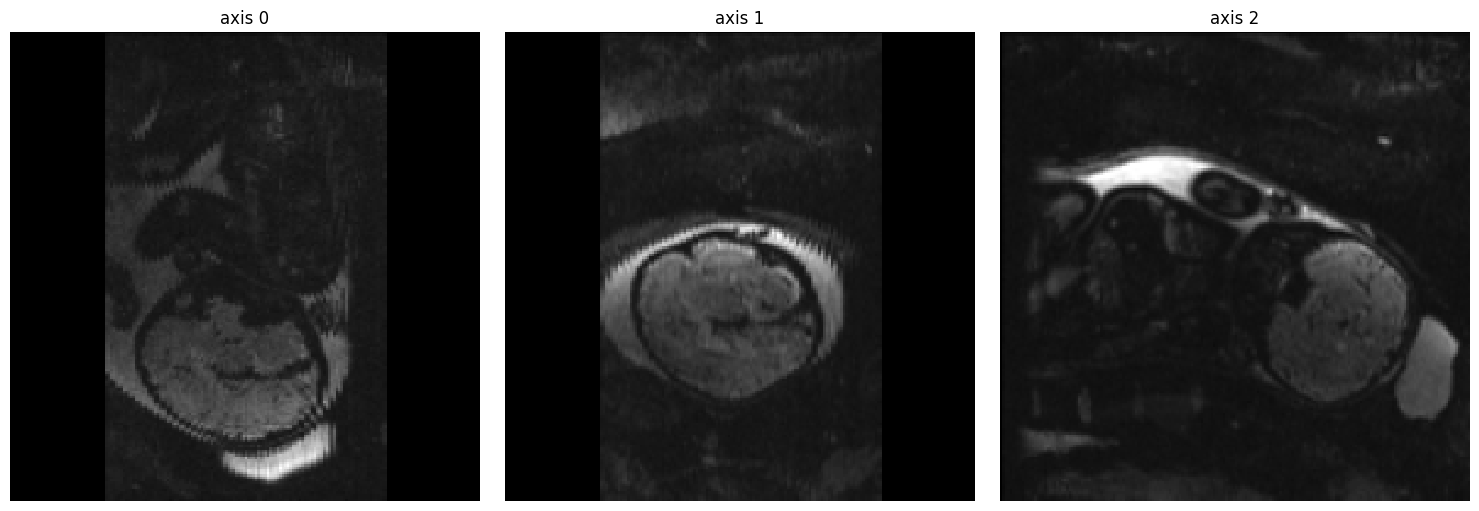

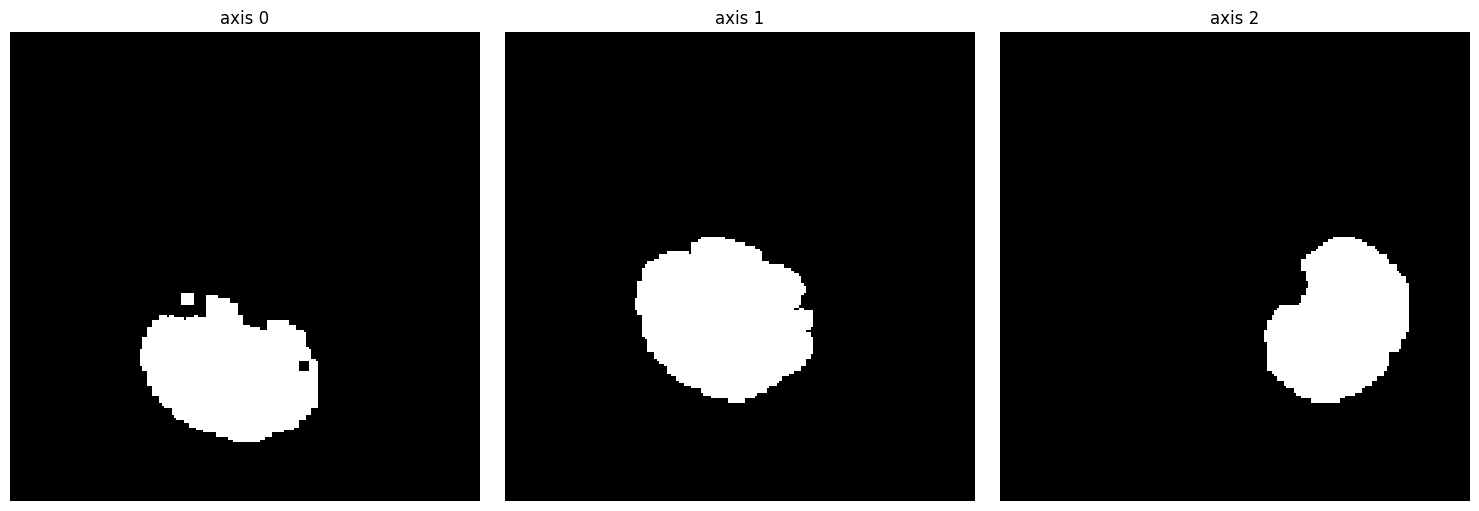

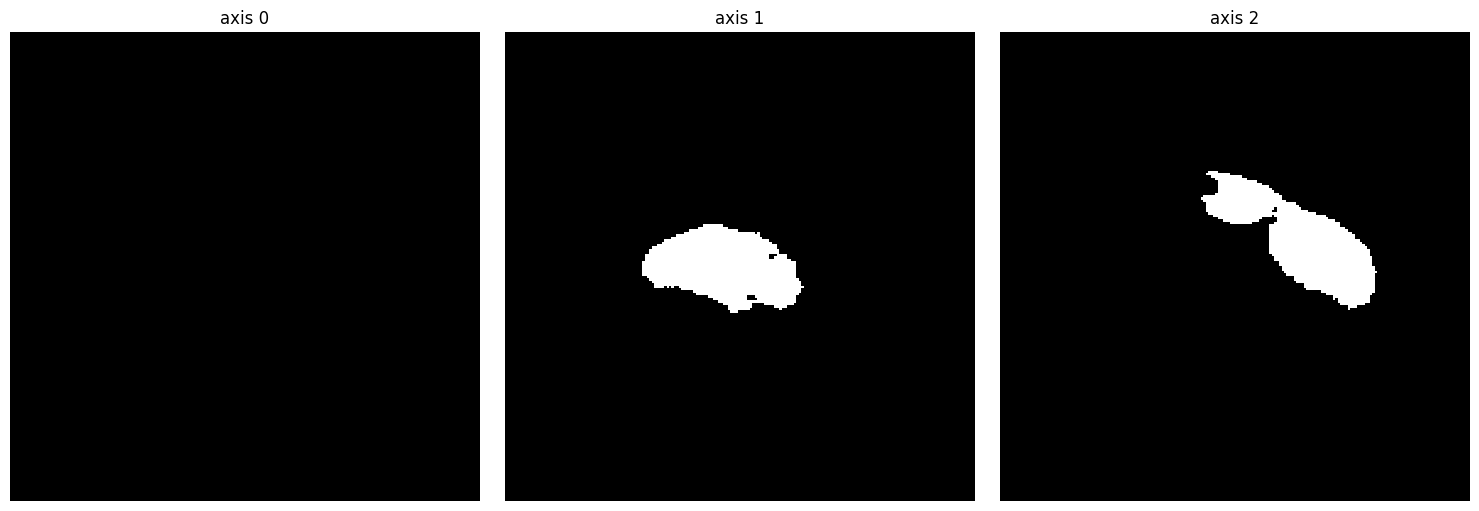

Hard Dice Coefficient: 0.1941810058243132
Soft Dice Coefficient: -0.5296266674995422


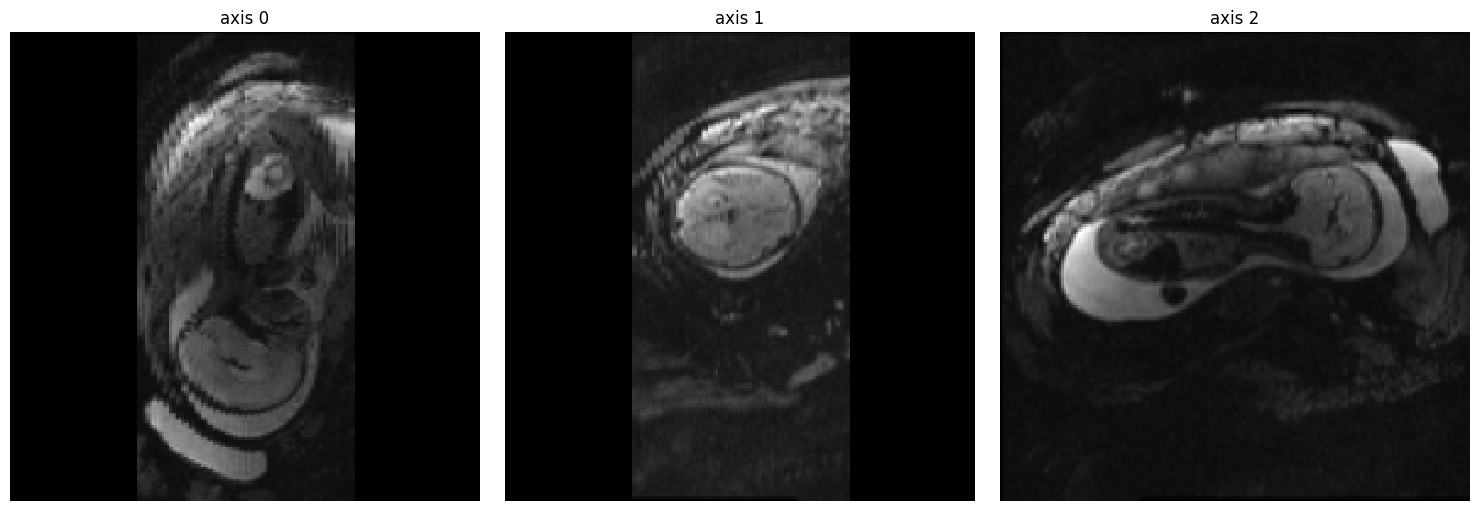

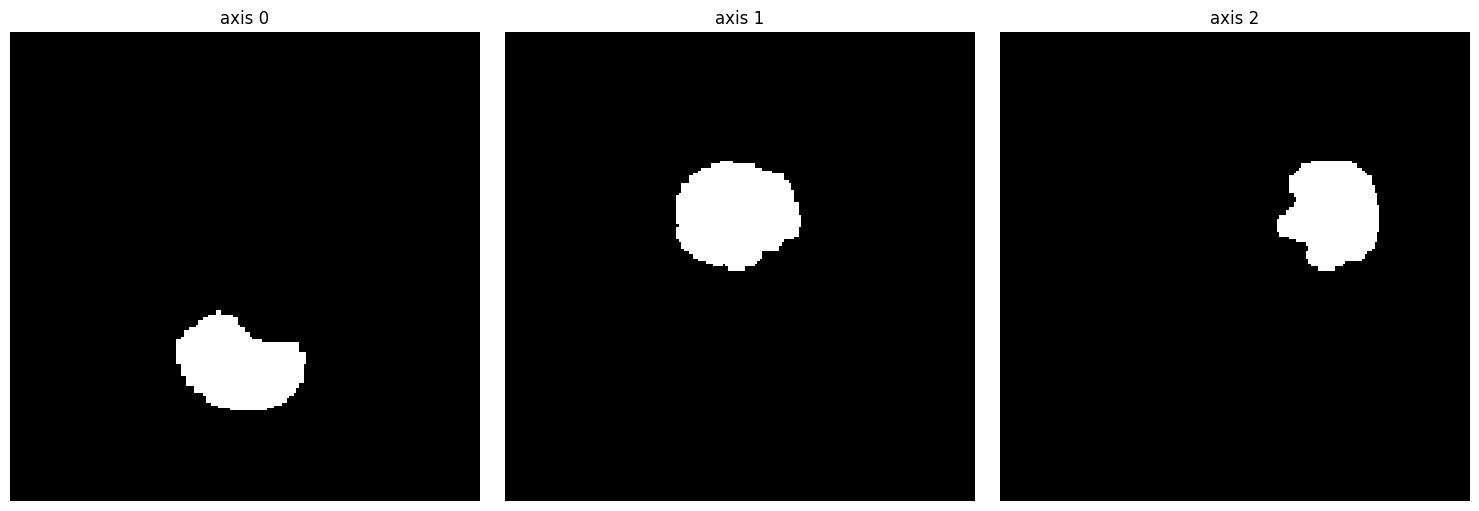

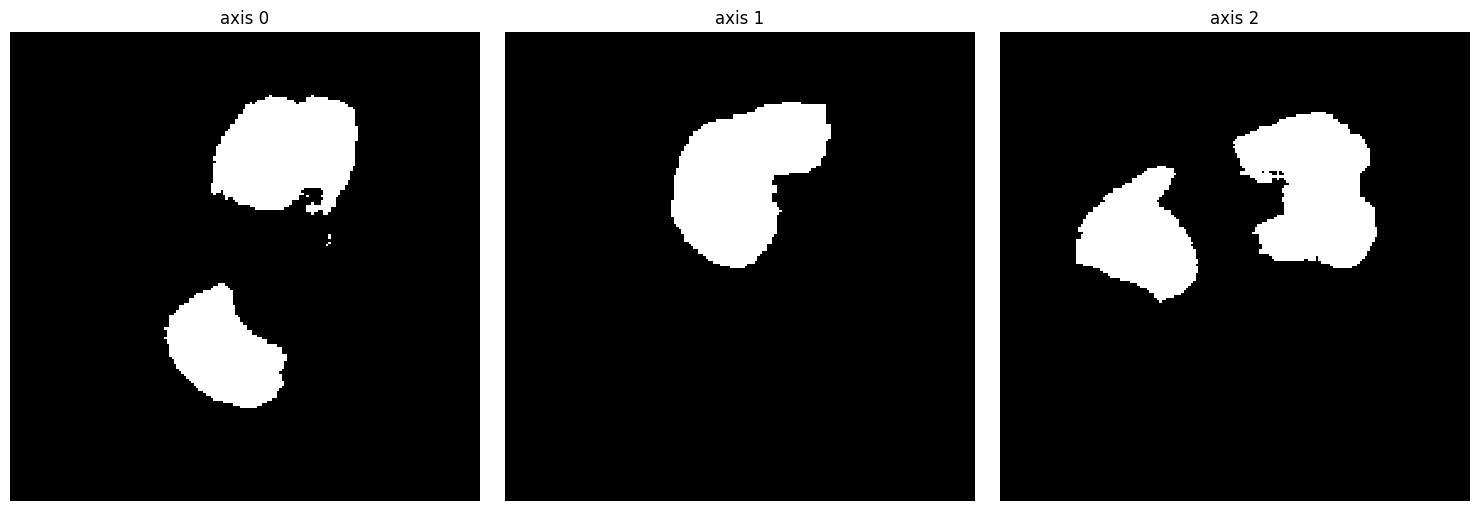

Hard Dice Coefficient: 0.0
Soft Dice Coefficient: -0.4887588322162628


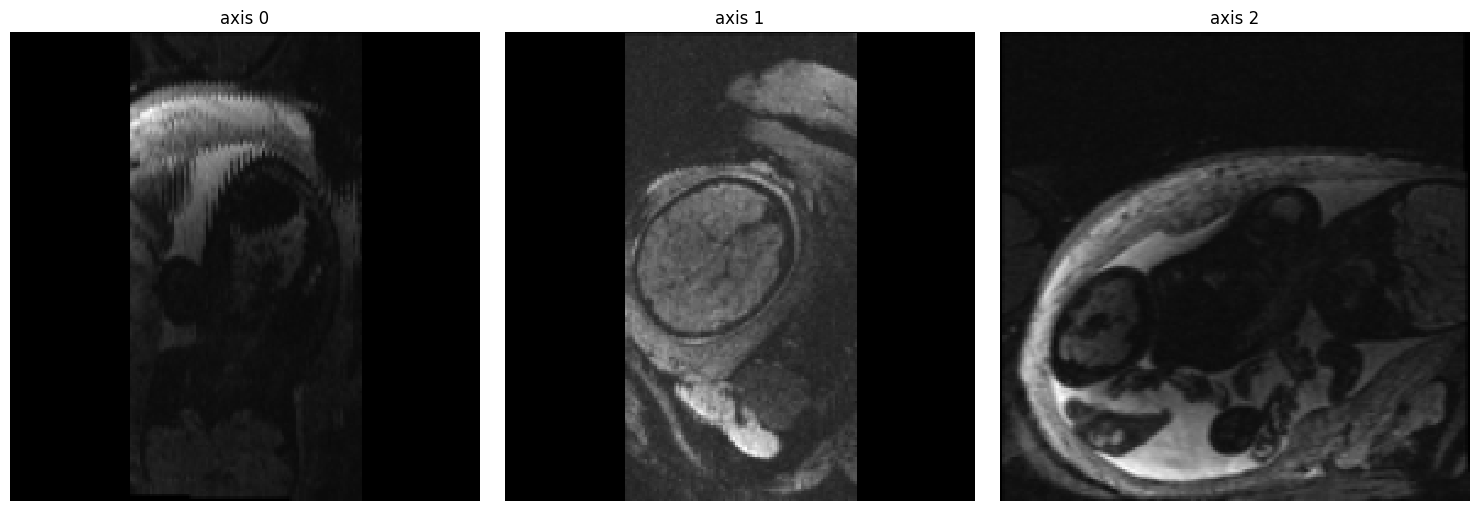

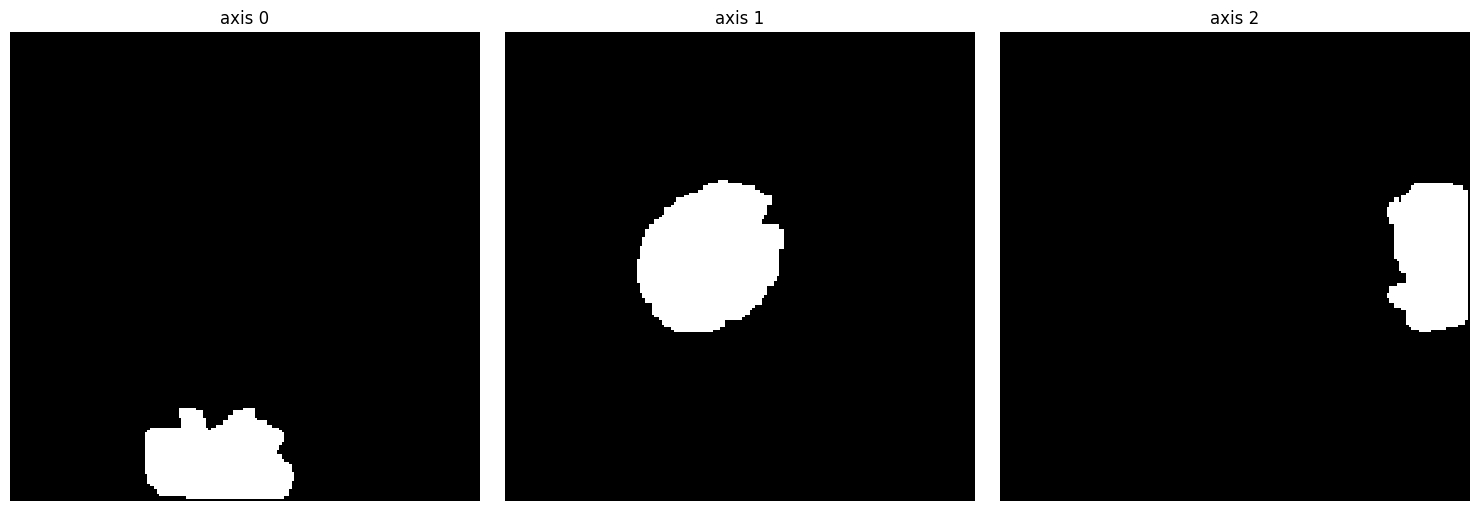

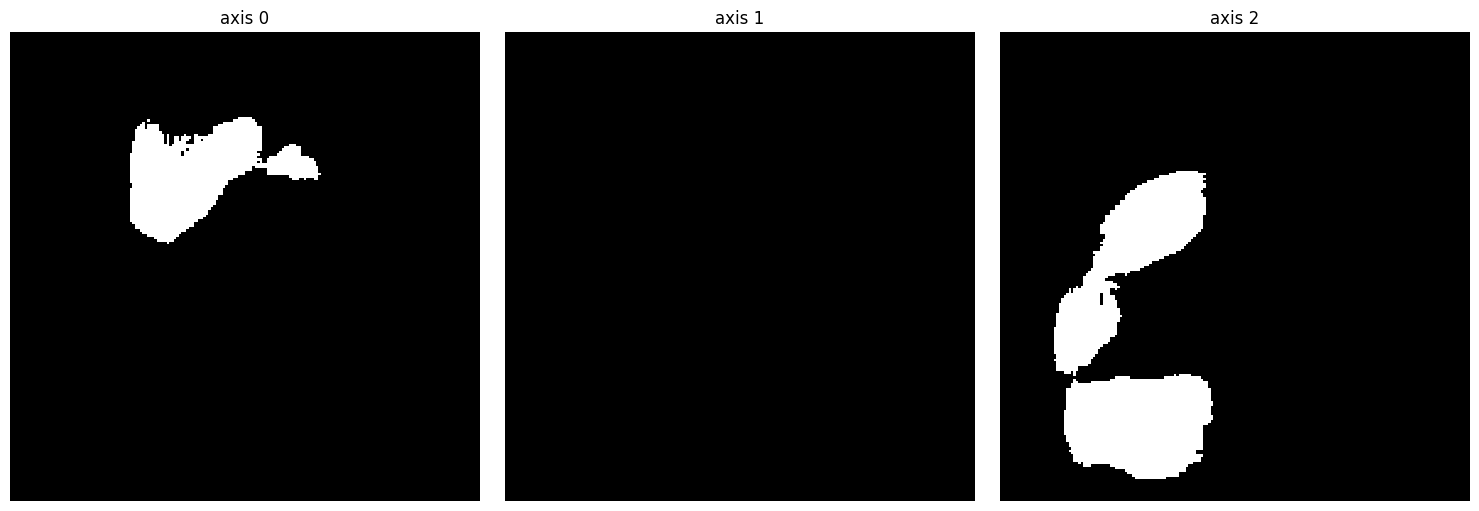

Hard Dice Coefficient: 0.10261421738413326
Soft Dice Coefficient: -0.506260335445404


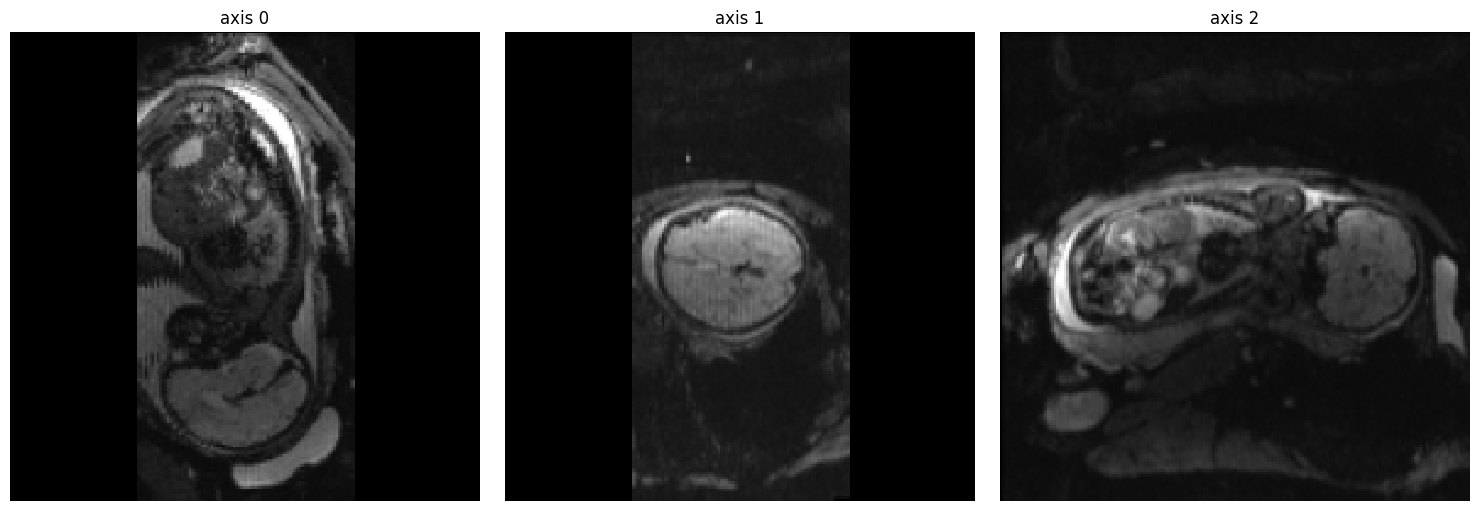

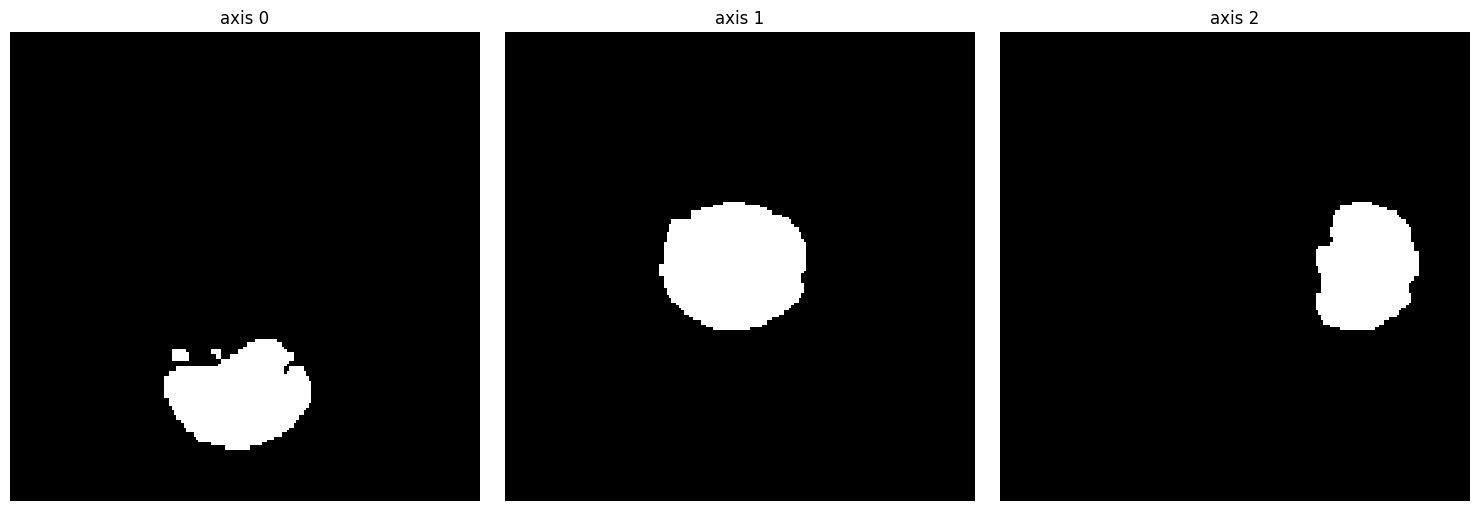

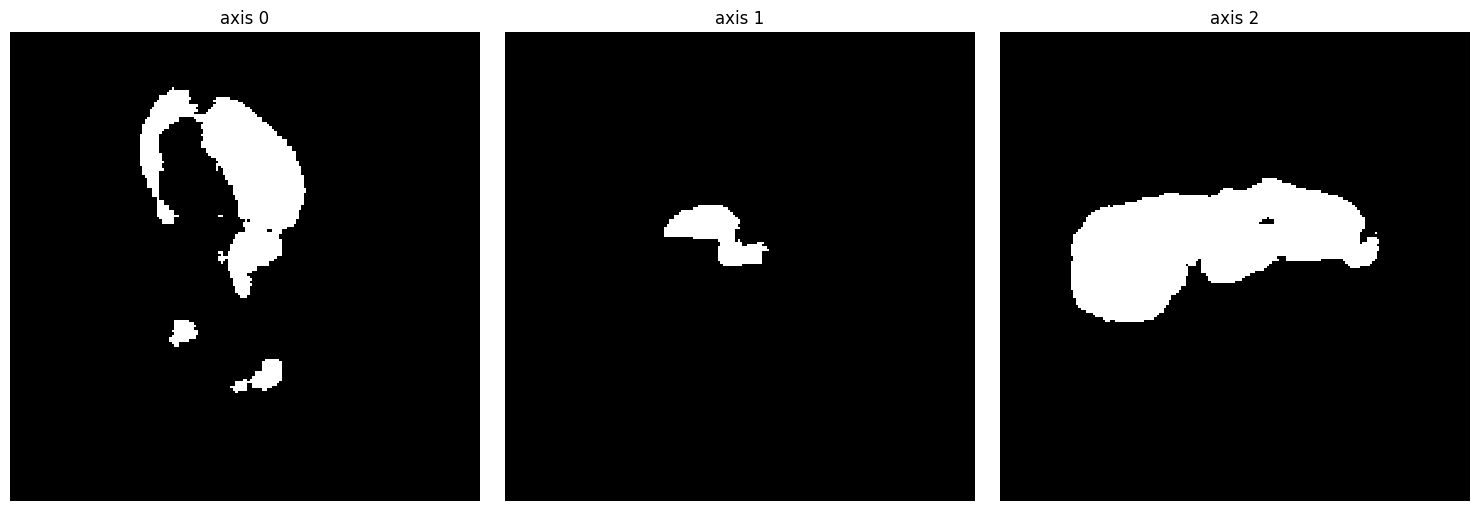

Hard Dice Coefficient: 0.0
Soft Dice Coefficient: -0.48706328868865967


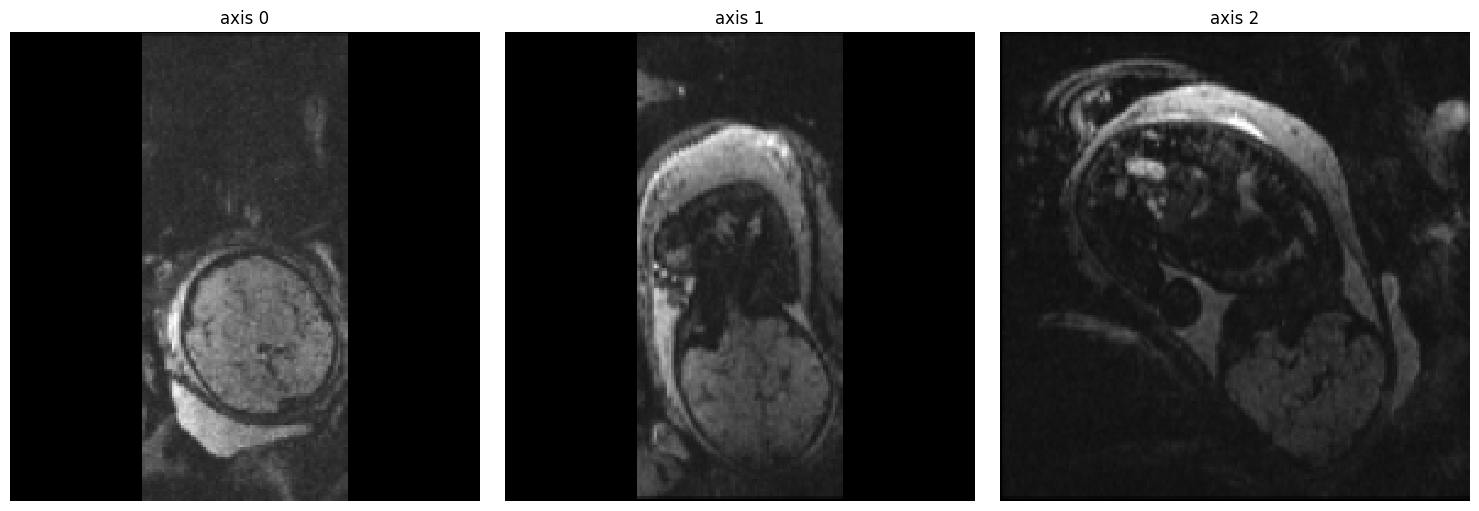

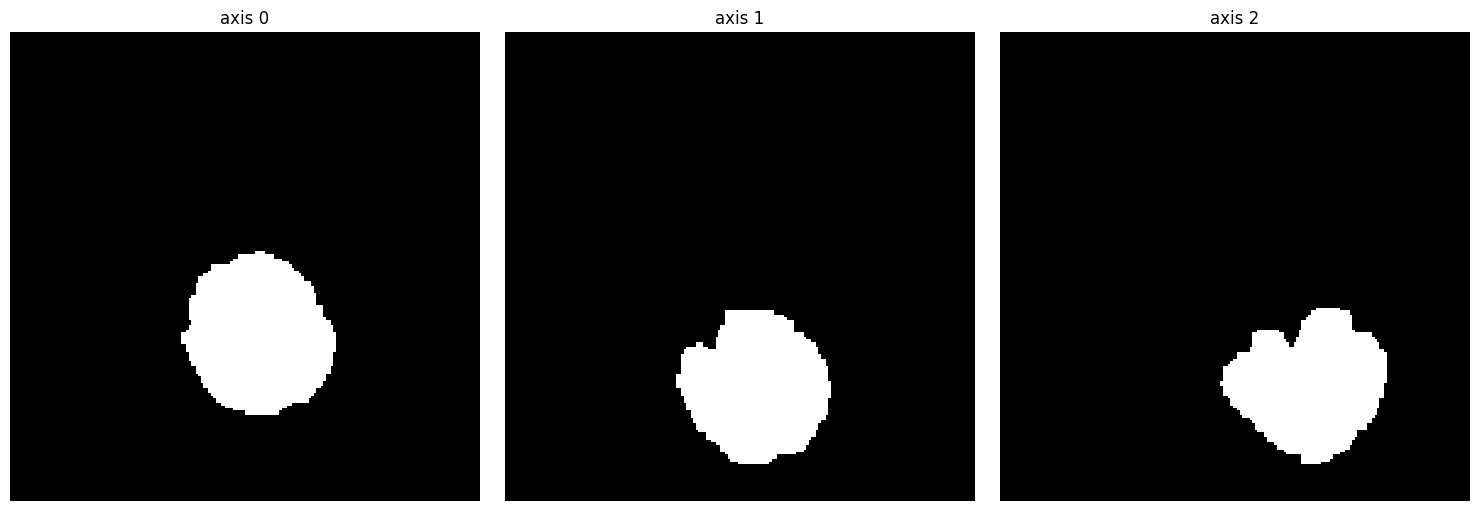

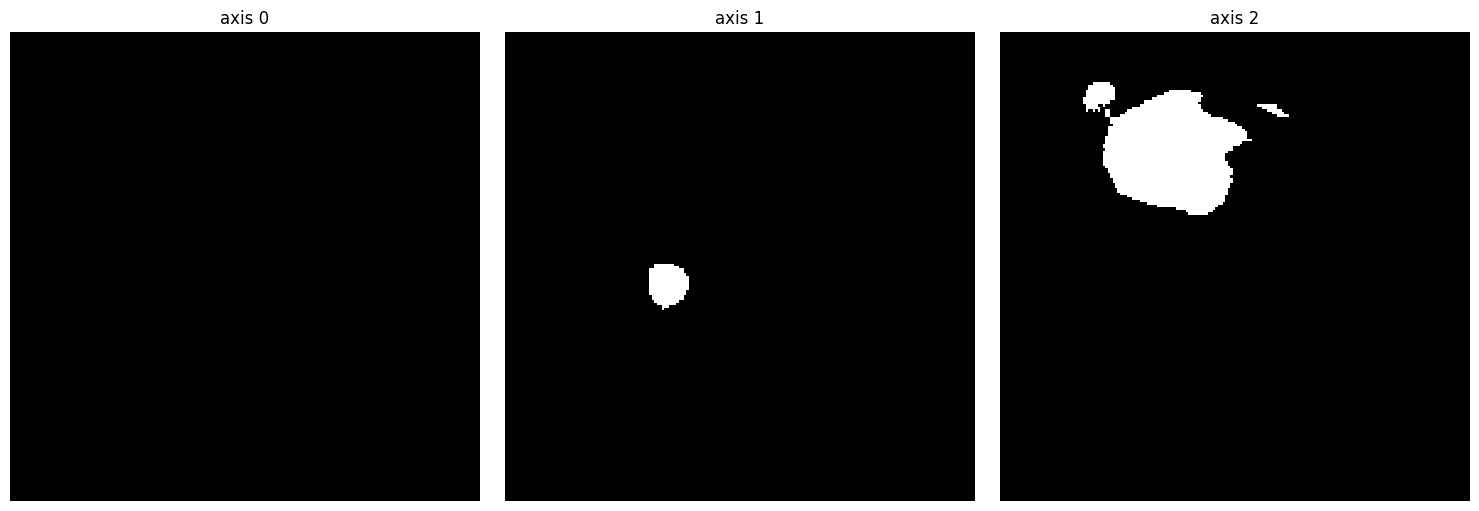

Hard Dice Coefficient: 0.0
Soft Dice Coefficient: -0.4884026348590851


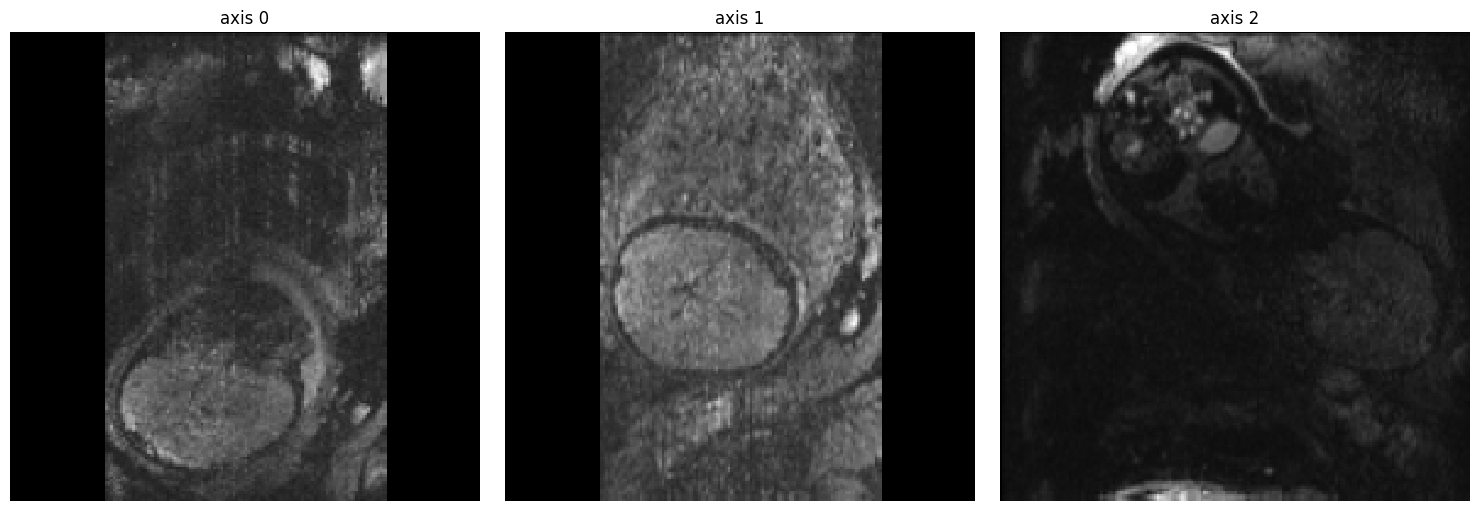

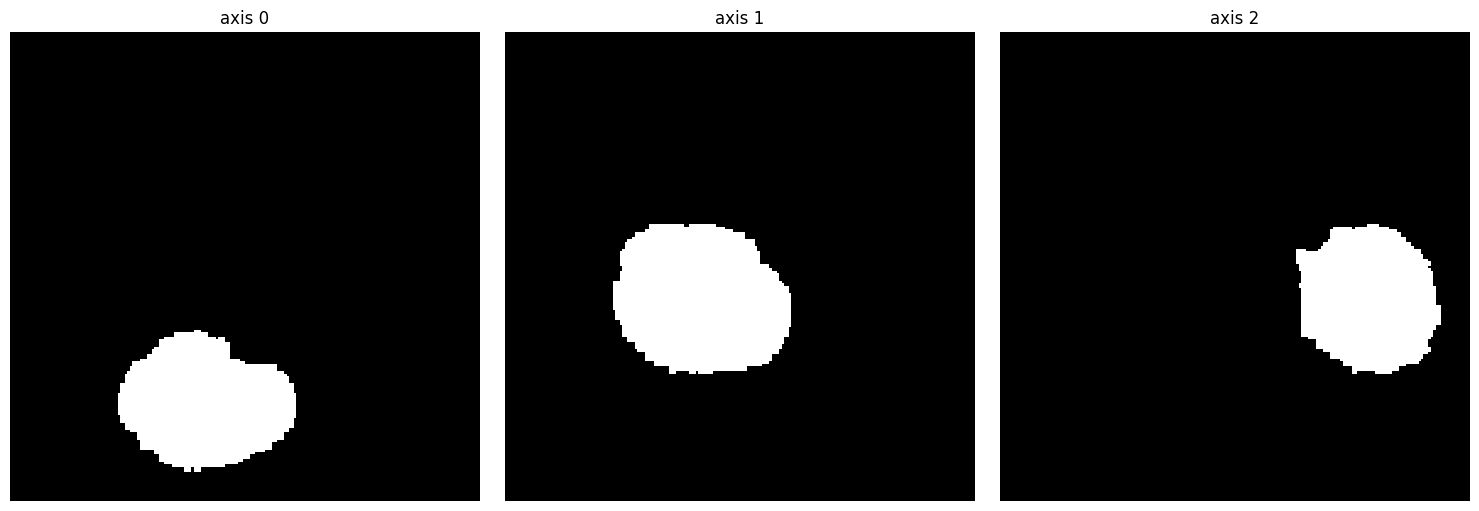

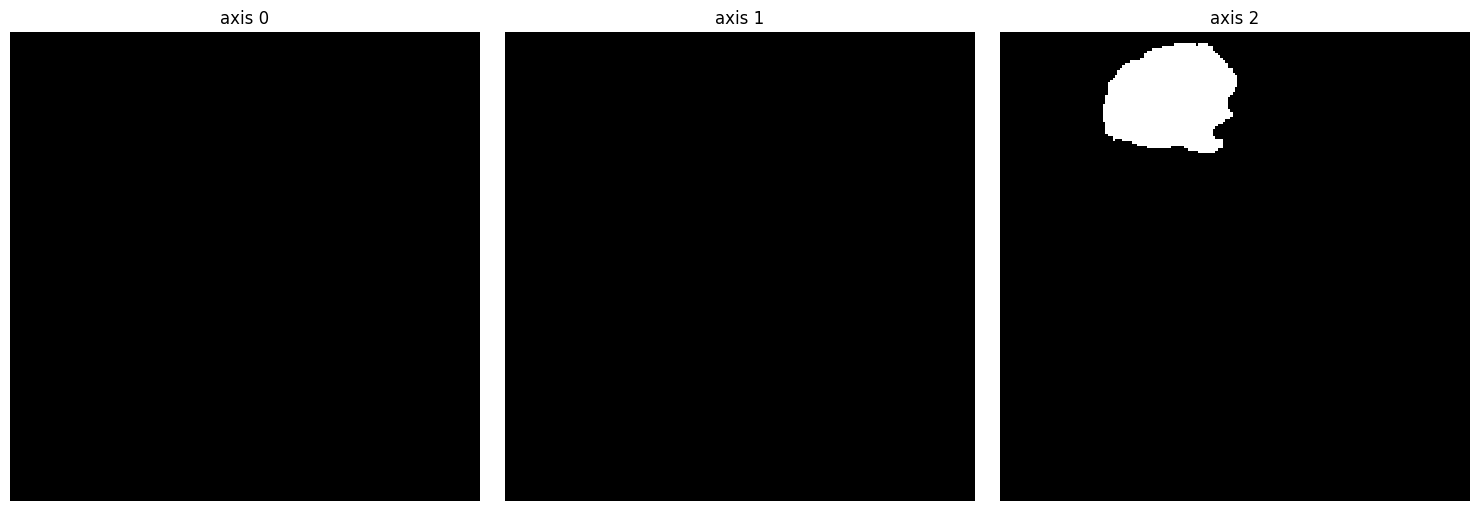

Hard Dice Coefficient: 0.07650660130140492
Soft Dice Coefficient: -0.4993203580379486


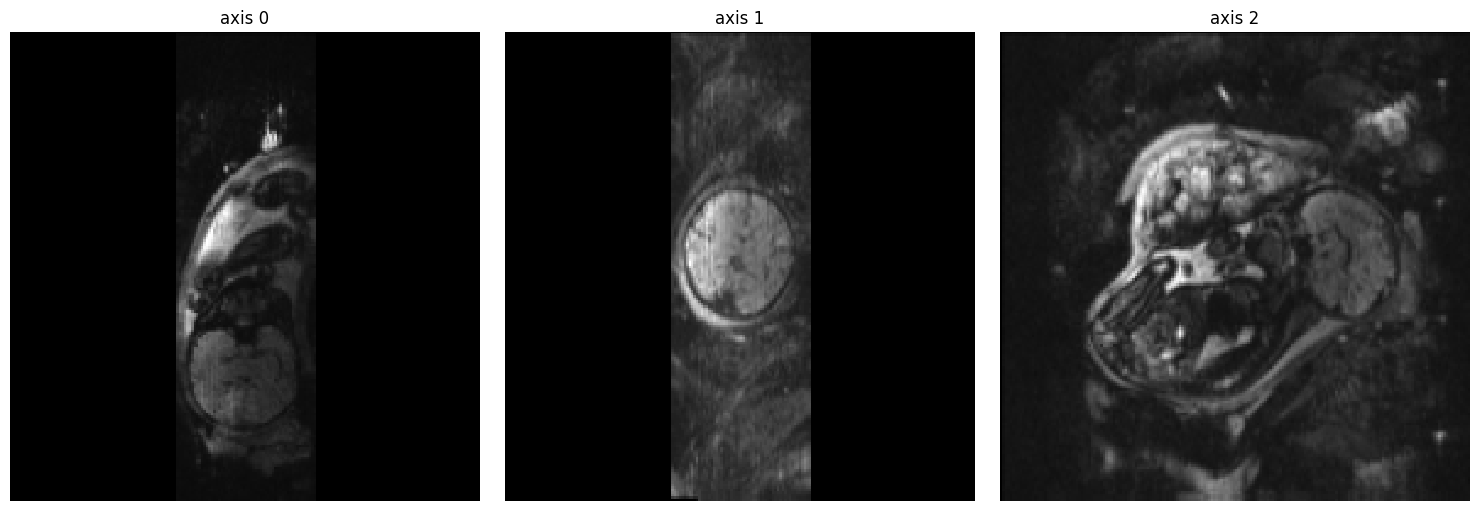

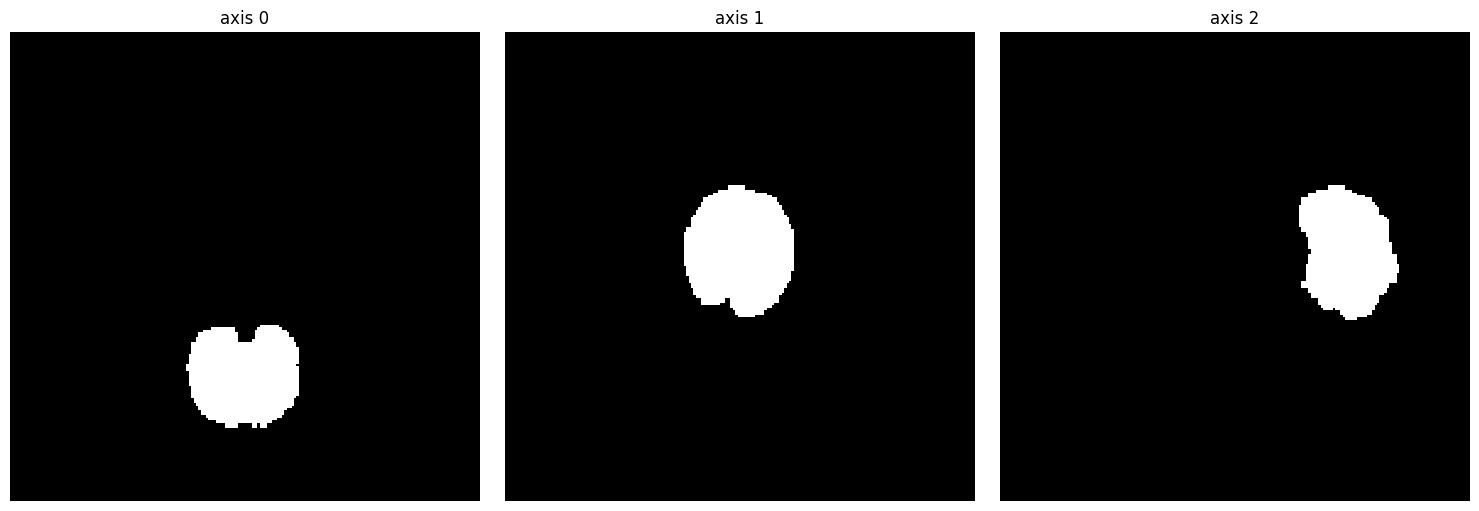

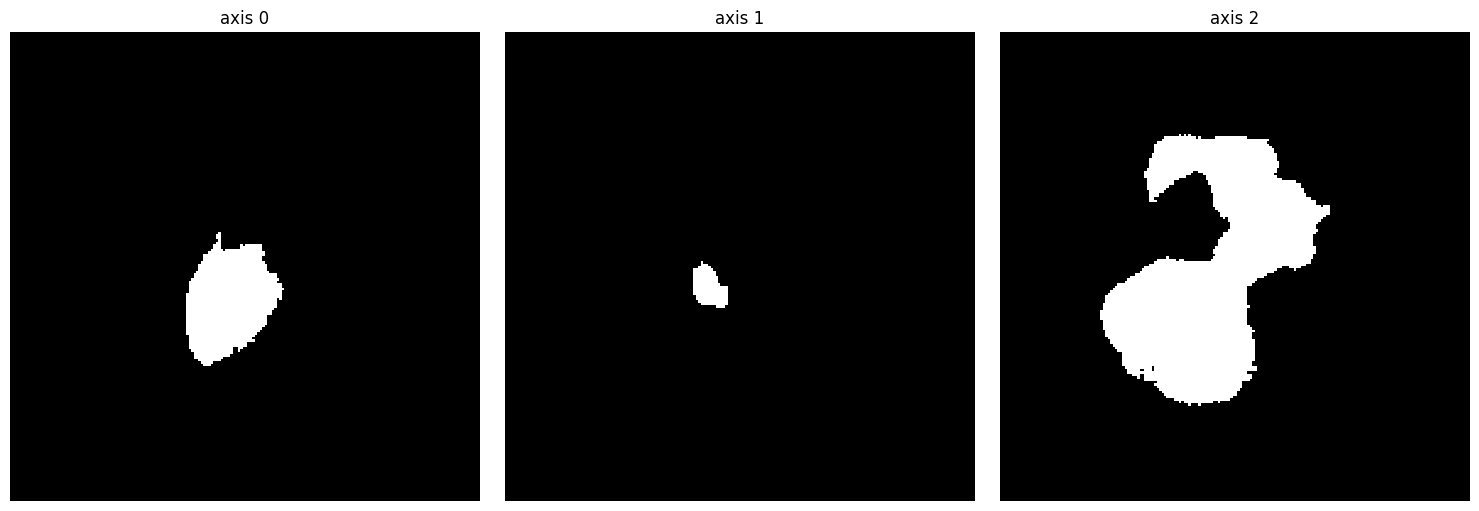

Hard Dice Coefficient: 0.05908712336046518
Soft Dice Coefficient: -0.5171417593955994


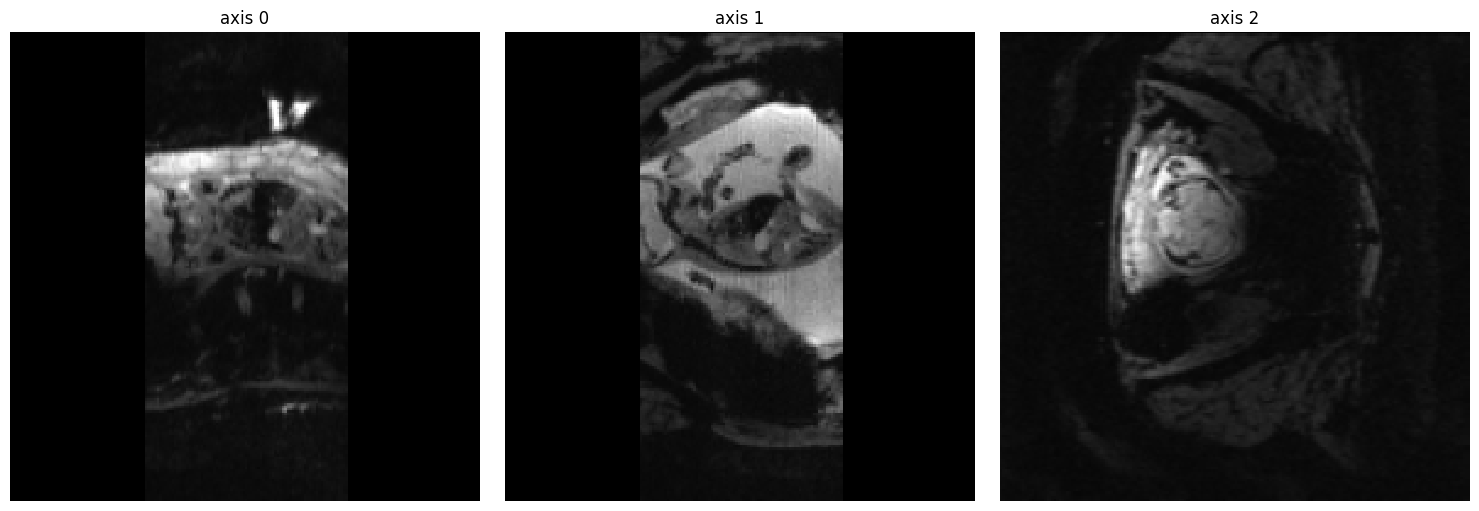

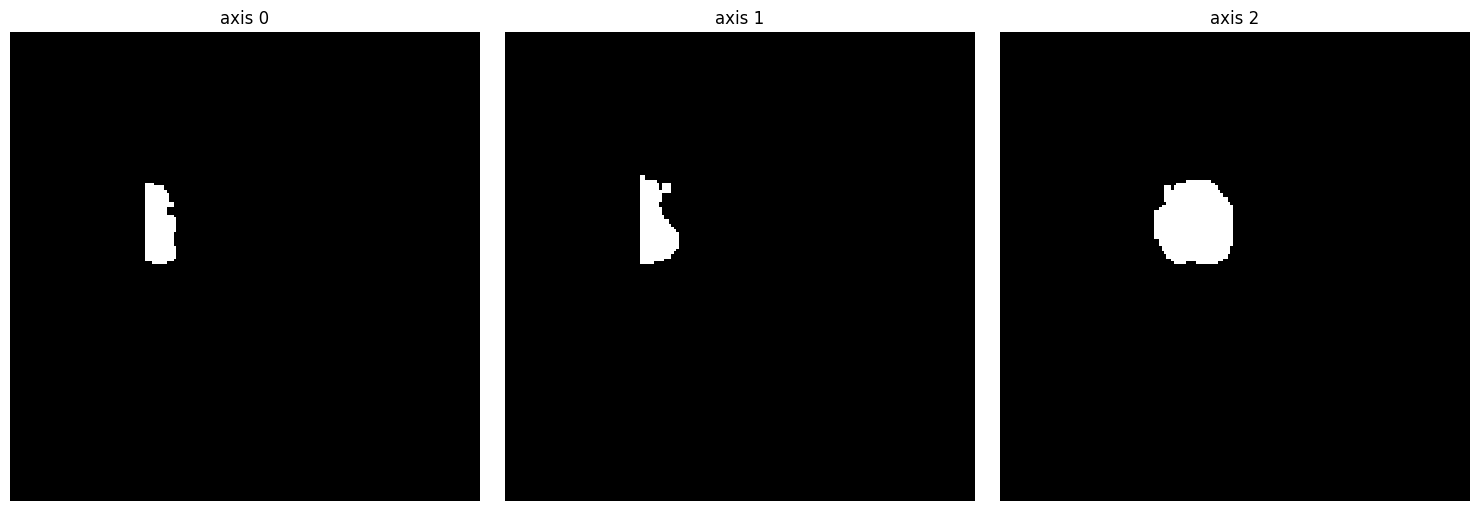

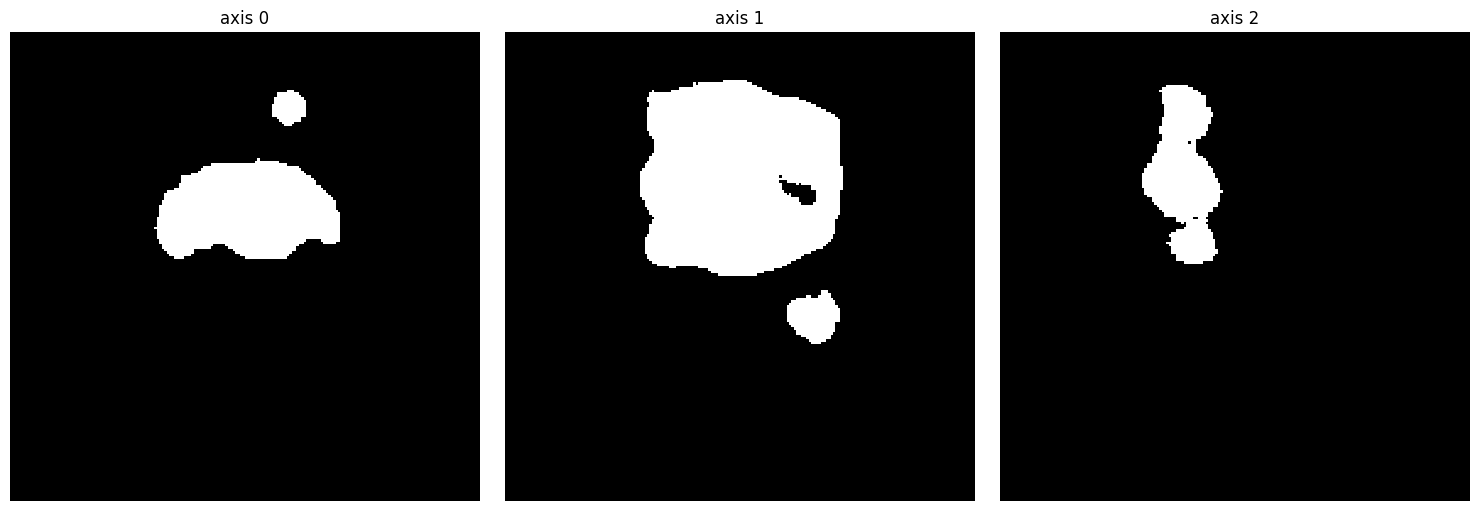

Hard Dice Coefficient: 0.11940661093301928
Soft Dice Coefficient: -0.5082438588142395


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import tensorflow as tf
from tensorflow.keras.models import Model
from neurite.tf import models  # Assuming the module's location
import voxelmorph.tf.losses as vtml
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Input, BatchNormalization
from tensorflow.keras.layers import Lambda
import neurite as ne
import sys
import nibabel as nib
from tensorflow.keras.models import load_model
from neurite_sandbox.tf.models import labels_to_labels
import nibabel as nib
from tqdm import tqdm
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import neurite as ne
import voxelmorph as vxm
from utils import *
import pathlib
import surfa as sf
import numpy as np
from skimage.measure import label  
import os
import numpy as np
import surfa as sf
from utils import resize
import re
import json
import numpy as np
from sklearn.metrics import f1_score
from keras import backend as K


def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred)
    return (2.0 * intersection) / (union) 

def my_hard_dice(y_true, y_pred):
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    dice = dice_coefficient(y_true_flat, y_pred_flat)
    return dice
    
    
# def all_non_zero_inside(y_true, y_pred):
#     """
#     Checks if all non-zero voxels in y_true are also non-zero in y_pred.
    
#     Args:
#         y_true (numpy.ndarray): Ground truth data (true labels).
#         y_pred (numpy.ndarray): Predicted data (model output).
        
#     Returns:
#         bool: True if all non-zero voxels in y_true are also non-zero in y_pred, else False.
#     """
#     # Ensure both y_true and y_pred have the same shape
#     assert y_true.shape == y_pred.shape, "Shapes of y_true and y_pred must match"
    
#     # Check if all non-zero voxels in y_true are also non-zero in y_pred
#     non_zero_indices = y_true.nonzero()
#     for idx in zip(*non_zero_indices):
#         if y_pred[idx] == 0:
#             return 0
    
#     return 1
#     # return not np.any(diff > 0)

    

    
# def soft_dice(a, b):
#     dim = len(a.shape) - 2
#     space = list(range(1, dim + 1))
#     # print("dim",dim,"space",space,"a.dim",a.shape,"b.dim",b.shape)
#     top = 2 * tf.reduce_sum(a * b, axis=space)
#     bot = tf.reduce_sum(a ** 2, axis=space) + tf.reduce_sum(b ** 2, axis=space)
    
#     out = tf.divide(top, bot + 1e-6)
#     return -tf.reduce_mean(out)


    

tf.get_logger().setLevel('ERROR')

warp_blur_min=np.array([2, 4, 8])
bias_blur_min=np.array([2, 4, 8])
bias_blur_max=bias_blur_min*2





random.seed(3000)
def load_detection_model(checkpoint_path,gmm, norm , detection , num_dim=3,nb_labels=2,
                                            dimx=192,
                                            dimy=192,
                                            dimz=192,
                                            batch_size=8,
                                            warp_max=2.5,
                                            warp_min=.5,
                                            warp_blur_min=np.array([2, 4, 8]),
                                            warp_blur_max=warp_blur_min*2,
                                            bias_blur_min=np.array([2, 4, 8]),
                                            bias_blur_max=bias_blur_min*2,
                                            initial_lr=1e-4,
                                            lr = 1e-4,
                                            lr_lin = 1e-4,
                                            nb_levels=5,
                                            conv_size=3,
                                            num_epochs=40000,
                                            num_bg_labels=16,
                                            nb_conv_per_level=2):

    input_img = Input(shape=(dimx, dimy, dimz, 1))
    min_max_norm = Lambda(lambda x: (x - K.min(x)) / (K.max(x) - K.min(x)) * (1.0) )

    unet_model = vxm.networks.Unet(inshape=(dimx, dimy, dimz, 1), nb_features=(en, de), 
                                   nb_conv_per_level=nb_conv_per_level,
                                   final_activation_function='softmax')

    print("loading detection model!")
    segmentation = unet_model(input_img)
    combined_model = Model(inputs=input_img, outputs=segmentation)


    if os.path.exists(checkpoint_path):
        combined_model.load_weights(checkpoint_path)
        print("Loaded weights from the checkpoint and continued training.")
    else:
        # print(checkpoint_path)
        print("Checkpoint file not found.")
    unet_model = combined_model.layers[-1]

    return unet_model


def load_model3D(checkpoint_path,gmm, norm , ninty_norm, bn ,nb_labels=2,
                                             num_dim=3,
                                            dimx=192,
                                            dimy=192,
                                            dimz=192,
                                            batch_size=8,
                                            warp_max=2.5,
                                            warp_min=.5,
                                            warp_blur_min=np.array([2, 4, 8]),
                                            warp_blur_max=warp_blur_min*2,
                                            bias_blur_min=np.array([2, 4, 8]),
                                            bias_blur_max=bias_blur_min*2,
                                            initial_lr=1e-4,
                                            lr = 1e-4,
                                            lr_lin = 1e-4,
                                            nb_levels=5,
                                            conv_size=3,
                                            num_epochs=40000,
                                            num_bg_labels=16,
                                            nb_conv_per_level=2):

    input_img = Input(shape=(dimx, dimy, dimz, 1))
    epsilon =1e-7
    min_max_norm = Lambda(lambda x: (x - K.min(x)) / (K.max(x) - K.min(x)+ epsilon) * (1.0) )

    unet_model = vxm.networks.Unet(inshape=(dimx, dimy, dimz, 1), nb_features=(en, de), batch_norm=bn,
                           nb_conv_per_level=nb_conv_per_level,
                           final_activation_function='softmax')
    
    print("loading second model!")
    print("bn:",bn,"norm:",norm,"90",ninty_norm)
    if gmm:

        # input_img = Input(shape=(*in_shape,1))
        input_brain = get_brain_tf(input_img)
        _, y_brain = model1(input_brain)

        input_fov = get_fov_tf(input_img)
        
        _, y_fov = model2(input_fov)
        # input_final = y_brain + y_fov * (y_brain == 0)
        input_final = y_brain + tf.cast(y_fov, dtype=tf.int32) * tf.cast(y_brain == 0, dtype=tf.int32)

        generated_img, y = labels_to_image_model(input_final)
        segmentation = unet_model(generated_img)
        combined_model = Model(inputs=input_img, outputs=segmentation)
    elif norm:
        generated_img_norm = min_max_norm(input_img)
        segmentation = unet_model(generated_img_norm)
        combined_model = Model(inputs=input_img, outputs=segmentation)
    else:
        generated_img_norm = percentile_norm_tf(input_img)
        segmentation = unet_model(input_img)
        combined_model = Model(inputs=input_img, outputs=segmentation)

    if os.path.exists(checkpoint_path):
        print(checkpoint_path)
        combined_model.load_weights(checkpoint_path)
        print("Loaded weights from the checkpoint and continued training.")
    else:
        # print(checkpoint_path)
        print("Checkpoint file not found.")
    # print(combined_model.summary())
    # unet_model = combined_model.layers[-1]

    return combined_model


num_row = 3
per_row = 10

    
def calculate_dice_coefficient(ground_truth, predicted):
    intersection = np.sum(np.logical_and(ground_truth, predicted))
    union = np.sum(np.logical_or(ground_truth, predicted))

    dice_coefficient = (2.0 * intersection) / (union + intersection)
    return dice_coefficient

def print_row_dice_coefficients(i, row_dice_coefficients):
    formatted_dice = [f"   {dice:.4f}" for j, dice in enumerate(row_dice_coefficients)]
    num_spaces = num_row-1
    padding_left = 0
    padding_right = 0

    formatted_output = f"{' ' * padding_left}{'       '.join(formatted_dice)}{' ' * padding_right}"
    print(f' {formatted_output}')
    

def load_models():
    with open("params_192.json", "r") as json_file:
        config = json.load(json_file)

    model1_config = config["brain"]
    model2_config = config["body"]
    model3_config = config["labels_to_image_model"]
    model4_config = config["labels_to_image_model_with_shapes"]
    
    # Convert labels_out keys to integers for all models
    # model1_config["labels_out"] = {int(key): value for key, value in model1_config["labels_out"].items()}
    # model2_config["labels_out"] = {int(key): value for key, value in model2_config["labels_out"].items()}
    model3_config["labels_out"] = {int(key): value for key, value in model3_config["labels_out"].items()}
    
    model4_config["labels_out"] = {int(key): value for key, value in model3_config["labels_out"].items()}
    # Now you have the modified configuration
    # Brain
    model1 = create_model(model1_config)
    # Body
    model2 = create_model(model2_config)
    # Model
    labels_to_image_model = create_model(model3_config)
    return model1, model2, labels_to_image_model
model1, model2, labels_to_image_model = load_models()
import os, shutil, glob

# models_dir='models_mgh_brain_mgh_body_192'
# models_dir='models_feta_mgh_body_192'
# models_dir = 'models_feta_mgh_brain_mgh_body_192'
# models_dir='models_synth_shapes_feta_192'
# models_dir='models_synth_feta_mgh_brain_mgh_body_192'
validation_folder_path="EPI_150"
# validation_folder_path="validation"
# validation_folder_path="validation_synth"

gmm = False
cm=True
synth=True
conc=True

norm=False
bn=False
ninty_norm = not norm 

two_steps=False

if two_steps:
    step_size=1000
    if cm:
        box_models_dir='models_synth_detection_cm_norm_shapes_feta_192'
        models_dir='models_synth_less_conc_norm_shapes_feta_192'
        # models_dir='models_synth_less_conc_norm_shapes_feta_192'
    else:
        models_dir='models_synth_detection_norm_shapes_feta_192'
elif gmm:
    step_size=2000
    models_dir='models_synth_gmm_mgh_brain_mgh_body_192'
    # models_dir='models_synth_gmm_feta_mgh_body_192'
elif conc:
    step_size=600
    if two_steps:
        box_models_dir='models_synth_detection_cm_norm_shapes_feta_192'
    if synth and norm and bn:
        models_dir='models_synth_less_conc_bn_norm_shapes_feta_192'
    elif synth and ninty_norm and bn:
        models_dir='models_synth_less_conc_bn_90_shapes_feta_192'
    elif synth and not norm and not bn:
        models_dir='models_synth_less_conc_90_shapes_feta_192'
    elif synth and norm and not bn:
        models_dir='models_synth_less_conc_norm_shapes_feta_192'
    else:
        step_size=2000
        models_dir='models_less_conc_shapes_feta_192'
else:
    # models_dir='models_shapes_feta_192'
    if synth:
        step_size=60
        models_dir='models_synth_shapes_feta_192'
    else:
        step_size=500
        models_dir='models_shapes_feta_192'


if synth:
    en = [16, 16, 32 ,32 ,64 ,64 ,64 ,64 ,64 ,64 ,64 ,64 ,64]
    de = [64 ,64 ,64 ,64, 64 ,64 ,64, 64, 64, 32 ,32 ,16 ,16 ,2]
else:
    en=[16,16, 32,32, 64,64,128,128, 192,192]
    de=[192,192, 128,128,64,64,32,32,16,16,2]


nb_features = '_'.join(map(str, en))
dim_=192

latest_weight = max(glob.glob(os.path.join(models_dir, 'weights_epoch_*.h5')), key=os.path.getctime, default=None)
match = re.search(r'(\d+)', latest_weight.split("/")[1])
initial_epoch = int(match.group())

from scipy.ndimage import binary_dilation, binary_erosion
from scipy import ndimage

def eval(subfolders):
    b2_hard_dice_scores=[]
    b3_hard_dice_scores=[]
    last_soft_dice_scores=[]
    latest_images=[]
    latest_masks=[]

    for w in range(0, end_epoch+1, step_size):
        checkpoint_path=models_dir+'/weights_epoch_'+str(w)+'.h5'
        combined_model = load_model3D(checkpoint_path,gmm, norm, ninty_norm, bn, two_steps, num_dim=3, dimx=dim_,
                                                               dimy=dim_,
                                                               dimz=dim_)
    
        b2_10_hard_dice_scores = []
        b3_10_hard_dice_scores = []
        # last_10_soft_dice_scores =[]
        for folder in tqdm(subfolders):
            folder_path = os.path.join(validation_folder_path, folder)
            filename = os.path.join(folder_path,"image.nii.gz")
            mask_filename = os.path.join(folder_path,"manual.nii.gz")
            image = sf.load_volume(filename)
            
            # if validation_folder_path == "EPI_150":
            new_voxsize = [dynamic_resize(image)]*3

                
            # print(new_voxsize)
            orig_voxsize = image.geom.voxsize
            crop_img = image.resize([orig_voxsize[0],orig_voxsize[1],1], method="linear")
            crop_img = crop_img.resize(new_voxsize, method="linear").reshape([dim_, dim_, dim_])
            # crop_data = minmax_norm(crop_img.data)
            # crop_data = percentile_norm(crop_img.data)
            crop_data = crop_img.data
            
            mask = sf.load_volume(mask_filename).resize([orig_voxsize[0],orig_voxsize[1],1
                                                        ], method="linear")
            mask = mask.resize(new_voxsize).reshape([dim_, dim_, dim_, 1])
            mask.data[mask.data != 0] = 1
            # combined_model.summary()
            hard_dice_score = calculate_hard_dice(crop_img, combined_model, mask)
            # print("before mom calc")
            mom_str = folder.split("_")[1]
            # mom = int(folder.split("_")[1])
            if mom_str.isdigit():
                mom = int(mom_str)
                # print("Mom number: ",mom)
                if mom < 100:
                    b2_10_hard_dice_scores.append(hard_dice_score)
                else:
                    b3_10_hard_dice_scores.append(hard_dice_score)
            
            if abs(w-initial_epoch)<step_size:
                # print(mom)
                latest_images.append(crop_img)
                latest_masks.append(mask)
                
        b2_hard_dice_scores.append(np.mean(b2_10_hard_dice_scores))
        b3_hard_dice_scores.append(np.mean(b3_10_hard_dice_scores))
    return latest_images, latest_masks , b2_hard_dice_scores, b3_hard_dice_scores
    
def calculate_hard_dice(image, model, mask):
    # mask = sf.load_volume(mask_filename).reshape((dim_, dim_, dim_))


    prediction_one_hot = process_image(image.data, model)
    predictions_argmax = np.argmax(prediction_one_hot, axis=-1)
    prediction = np.squeeze(predictions_argmax, axis=0)
    mask.data[mask.data != 0] = 1
    prediction = ndimage.binary_fill_holes(prediction).astype(int)
    return my_hard_dice(prediction.flatten(),mask.data.flatten())

def visualize_1step(combined_model,image,mask, id):
    # crop_img = image.reshape((dim_, dim_, dim_,1))   

    orig_voxsize = image.geom.voxsize
    new_voxsize = [dynamic_resize(image)]*3
    crop_img = image.resize([orig_voxsize[0],orig_voxsize[1],new_voxsize[2]], method="nearest")#.reshape([dim_, dim_, dim_])
    crop_img = image.resize(new_voxsize, method="linear").reshape([dim_, dim_, dim_])
    crop_img = image.reshape([dim_, dim_, dim_])

    crop_data = crop_img.data

    prediction_one_hot = process_image(crop_data, combined_model)
    predictions_argmax = np.argmax(prediction_one_hot, axis=-1)
    prediction = np.squeeze(predictions_argmax, axis=0)

    prediction = sf.Volume(prediction)#.reshape(mask.data.shape)#.resample_like(mask)


    hard_dice_score = my_hard_dice(mask.data, prediction.data)
    soft_dice_score = soft_dice(tf.one_hot(mask.data,depth=2), prediction_one_hot)

    print(f"Hard Dice Coefficient: {hard_dice_score}")
    print(f"Soft Dice Coefficient: {soft_dice_score}")

    nib.save(nib.Nifti1Image(crop_img.astype(np.float32), np.eye(4), header=None), f"output/crop_img_{id}.nii.gz")
    nib.save(nib.Nifti1Image(prediction.data.astype(np.int32), np.eye(4), header=None), f"output/pred_{id}.nii.gz")
    nib.save(nib.Nifti1Image(mask.data.astype(np.int32), np.eye(4), header=None), f"output/mask_{id}.nii.gz")

    mean_slice_numbers = tuple(np.median(indices) for indices in np.where(mask != 0))

    ne.plot.volume3D(crop_img,slice_nos=mean_slice_numbers);
    ne.plot.volume3D(mask,slice_nos=mean_slice_numbers);
    ne.plot.volume3D(prediction,slice_nos=mean_slice_numbers);

    return hard_dice_score 


def visualize_2step(combined_model, box_model,image,mask, id):
    # crop_img = image.reshape((dim_, dim_, dim_,1))   

    orig_voxsize = image.geom.voxsize
    new_voxsize = [dynamic_resize(image)]*3
    crop_img = image.resize([orig_voxsize[0],orig_voxsize[1],1], method="nearest")#.reshape([dim_, dim_, dim_])
    crop_img = image.resize(new_voxsize, method="linear").reshape([dim_, dim_, dim_])
    crop_data = crop_img.data
    # crop_data = percentile_norm(crop_data)

    crop_data_mm = minmax_norm(crop_data)
    box_one_hot = process_image(crop_data_mm, box_model)

    box_one_hot = fit_bounding_rect_box(box_one_hot,margin=1)
    box_argmax = np.argmax(box_one_hot, axis=-1)
    box_pred = np.squeeze(box_argmax, axis=0)
    box_pred = sf.Volume(box_pred)

    crop_data_final = box_pred.data*crop_data.data
    crop_data_final = sf.Volume(crop_data_final)
    prediction_one_hot = process_image(crop_data_final.data, combined_model)
    predictions_argmax = np.argmax(prediction_one_hot, axis=-1)
    prediction = np.squeeze(predictions_argmax, axis=0)


    prediction = sf.Volume(prediction)#.reshape(mask.data.shape)#.resample_like(mask)
    # mask.data[mask.data != 0] = 1

    hard_dice_score = my_hard_dice(mask.data, prediction.data)
    print(f"Hard Dice Coefficient: {hard_dice_score}")
    encompass_dice_score = all_non_zero_inside(mask.data, box_pred.data)
    print(f"Encompass Score: {encompass_dice_score}")

    nib.save(nib.Nifti1Image(crop_img.astype(np.float32), np.eye(4), header=None), f"output/crop_img_{id}.nii.gz")
    nib.save(nib.Nifti1Image(prediction.data.astype(np.int32), np.eye(4), header=None), f"output/pred_{id}.nii.gz")
    nib.save(nib.Nifti1Image(mask.data.astype(np.int32), np.eye(4), header=None), f"output/mask_{id}.nii.gz")

    mean_slice_numbers = tuple(np.median(indices) for indices in np.where(mask != 0))

    ne.plot.volume3D(crop_img,slice_nos=mean_slice_numbers);
    ne.plot.volume3D(mask,slice_nos=mean_slice_numbers);
    ne.plot.volume3D(crop_data_final,slice_nos=mean_slice_numbers);
    ne.plot.volume3D(prediction,slice_nos=mean_slice_numbers);

    return hard_dice_score , encompass_dice_score


last_models_hard_dice_scores = []
n = 500
# for i in range(latest_epoch, latest_epoch - n, -10):
def load_model(models_dir,detection=False):
    latest_weight = max(glob.glob(os.path.join(models_dir, 'weights_epoch_*.h5')), key=os.path.getctime, default=None)
    match = re.search(r'(\d+)', latest_weight.split("/")[1])
    initial_epoch = int(match.group())

    checkpoint_path=models_dir+'/weights_epoch_'+str(initial_epoch)+'.h5'
    print(checkpoint_path,"detection",detection)
    if detection:
        combined_model = load_detection_model(checkpoint_path,gmm,norm, detection, num_dim=3, dimx=dim_,
                                                               dimy=dim_,
                                                               dimz=dim_)
    else:
        combined_model = load_model3D(checkpoint_path,gmm,norm, ninty_norm, bn, num_dim=3, dimx=dim_,
                                                               dimy=dim_,
                                                               dimz=dim_)
    return combined_model

combined_model = load_model(models_dir,detection=False)




subfolders = [f.name for f in os.scandir(validation_folder_path) if f.is_dir()]


new_voxsize = [0.65,0.65,0.65]

b2_hard_dice_scores=[]
b3_hard_dice_scores=[]

end_epoch = 0 + step_size * ((initial_epoch) // step_size)

latest_images, latest_masks , b2_hard_dice_scores, b3_hard_dice_scores = eval(subfolders)  
total_encompass_dice_score = 0
total_hard_dice_score = 0
if two_steps:
    box_model = load_model(box_models_dir,detection=True)
    for i in range(len(latest_images)):
        hard_dice_score , encompass_dice_score = visualize_2step(combined_model, box_model,latest_images[i],latest_masks[i],i)
        total_encompass_dice_score +=encompass_dice_score
        total_hard_dice_score +=hard_dice_score
    print("total_hard_dice_score:",total_hard_dice_score/len(latest_images))
    print("total_encompass_dice_score:",total_encompass_dice_score/len(latest_images))
else:
    for i in range(len(latest_images)):
        hard_dice_score  = visualize_1step(combined_model,latest_images[i],latest_masks[i],i)
        total_hard_dice_score +=hard_dice_score
    print("total_hard_dice_score:",total_hard_dice_score/len(latest_images))


b2 = b2_hard_dice_scores
b3 = b3_hard_dice_scores

bn_status = 'BN' if bn else 'No BN'
synth_status = 'Synth' if synth else 'Big Model'
conc_status = 'CONC' if conc else ''
norm_status = 'Norm' if norm else 'No Norm'
steps_status = 'Two Steps' if two_steps else 'One Step'

# Plot for B2
plt.subplot(1, 2, 1)
plt.scatter(range(len(b2)), b2, c='red', marker='x')
plt.plot(range(len(b2)), np.poly1d(np.polyfit(range(len(b2)), b2, 1))(range(len(b2))), 'r--')
plt.xlabel('Models'), plt.ylabel('B2 Hard Dice Score')

# Main title
plt.title(f'Mean Hard Dice - B2', fontsize=14)

# Subtitle
plt.text(0.5, -0.2, f'{bn_status}, {synth_status}, {conc_status}, {norm_status}, {steps_status}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)

# Plot for B3
plt.subplot(1, 2, 2)
plt.scatter(range(len(b3)), b3, c='blue', marker='o')
plt.plot(range(len(b3)), np.poly1d(np.polyfit(range(len(b3)), b3, 1))(range(len(b3))), 'b--')
plt.xlabel('Models'), plt.ylabel('B3 Hard Dice Score')

# Main title
plt.title(f'Mean Hard Dice - B3', fontsize=14)

# Subtitle
plt.text(0.5, -0.2, f'{bn_status}, {synth_status}, {conc_status}, {norm_status}, {steps_status}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()